# Bayesian optimization of a time-consuming simulator

The aim of the lab is to optimize a time-consuming simulator using the Efficient Global Optimization (EGO) method. As a toy example, the simulator chosen here mimics a catapult. There are 4 input variables, tuning the catapult, and 1 output, giving the distance of the projectile mark to the catapult. We want to find the value(s) of the input variable(s) maximizing that distance. Notice that the simulator is not time-consuming. However, for the sake of realism, we will limit the computational budget to 36 runs.

1. "By-hand" Optimization
<br> We provide here a shiny application (authored by Nicolas Durrande), which allows using the simulator interactively. Alternatively, you can use the web application, available here : https://durrande.shinyapps.io/catapult/

In [1]:
library(shiny)
# runApp()

*Question: By playing with the simulator, propose a set of input values giving the largest possible value of the output. Here we consider the noise-free case, by fixing the wind to zero.*

To continue running the notebook, you may need to interrupt the kernel (square symbol!). Then load the two following scripts, containing useful functions. 

In [2]:
source("catapultSettings.R")
source("catapultFunctions.R")

2. Let us create an initial design of experiences and compute the corresponding values.

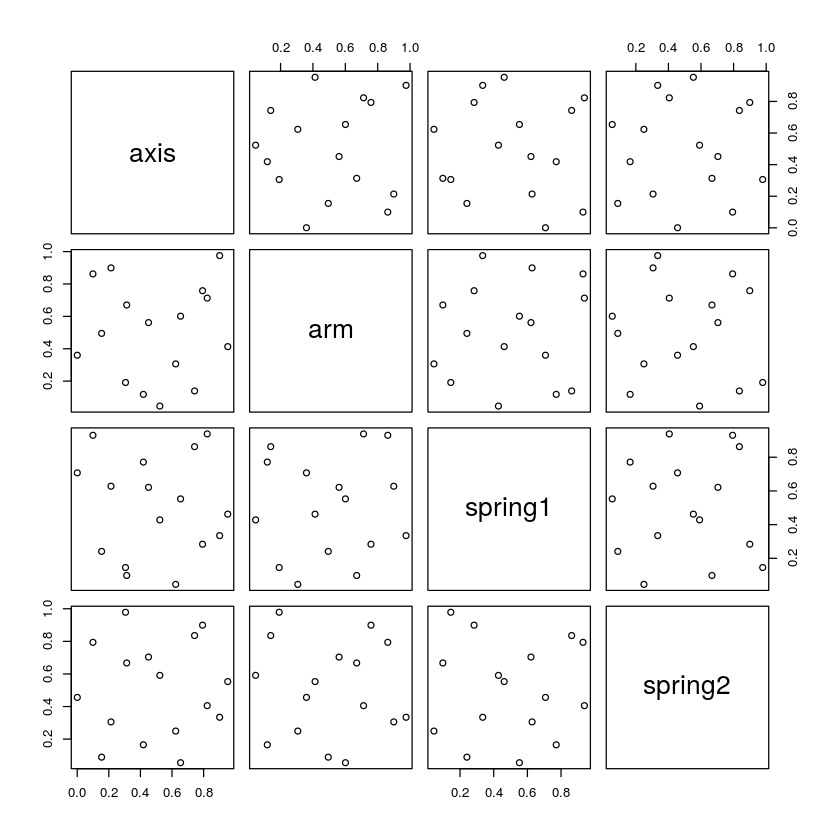

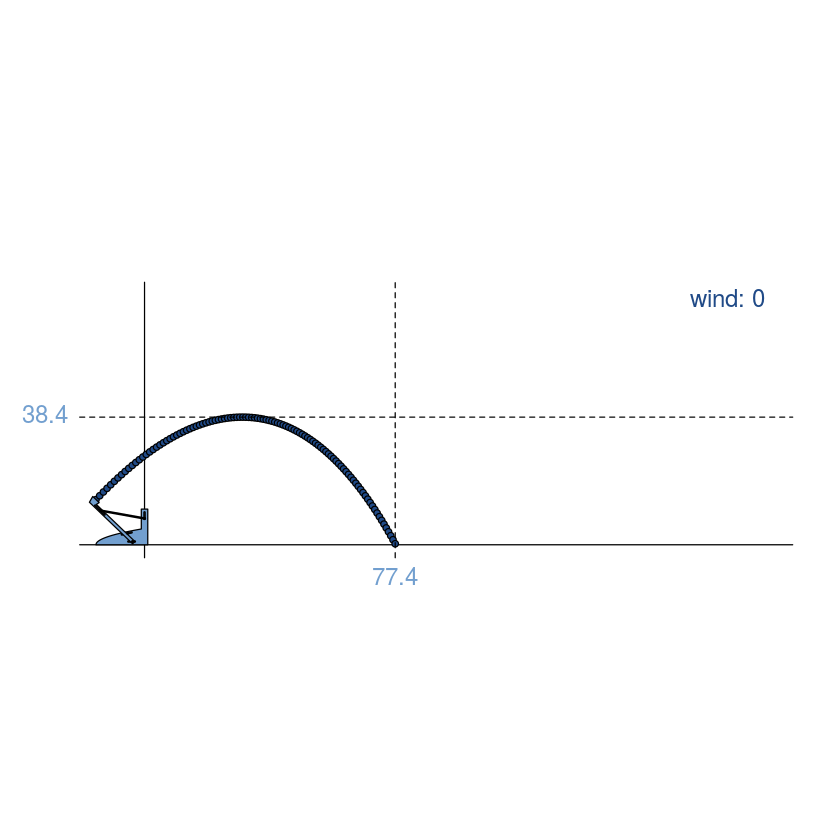

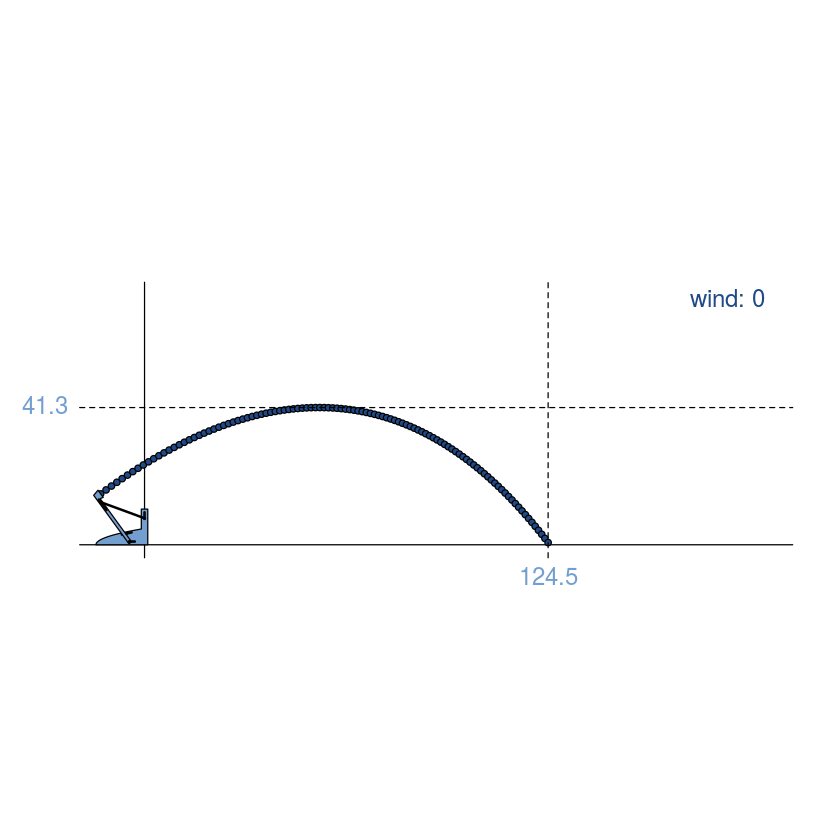

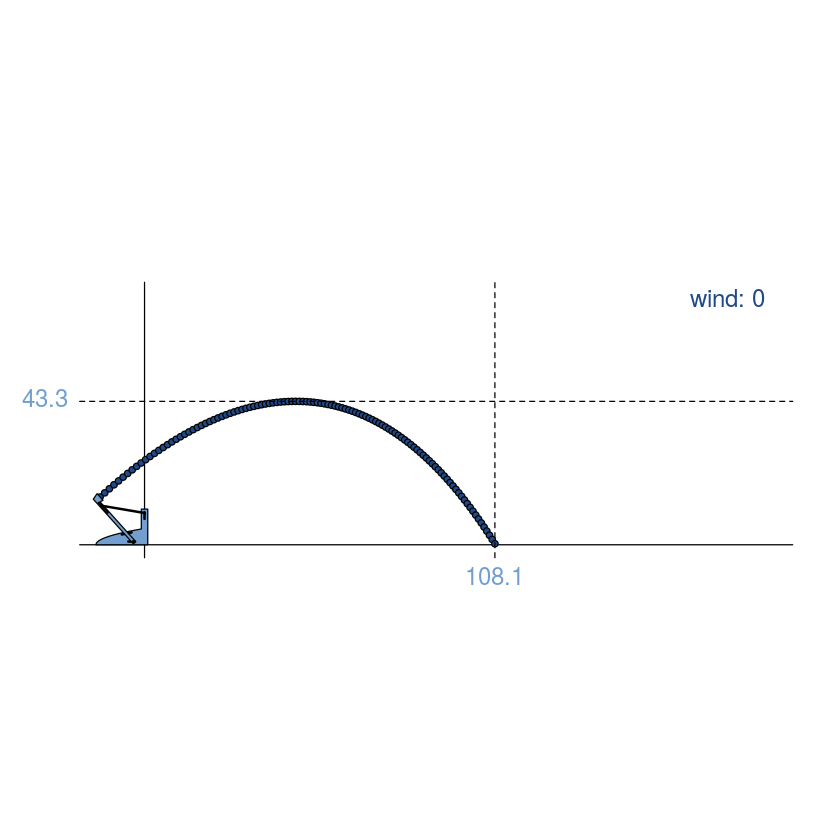

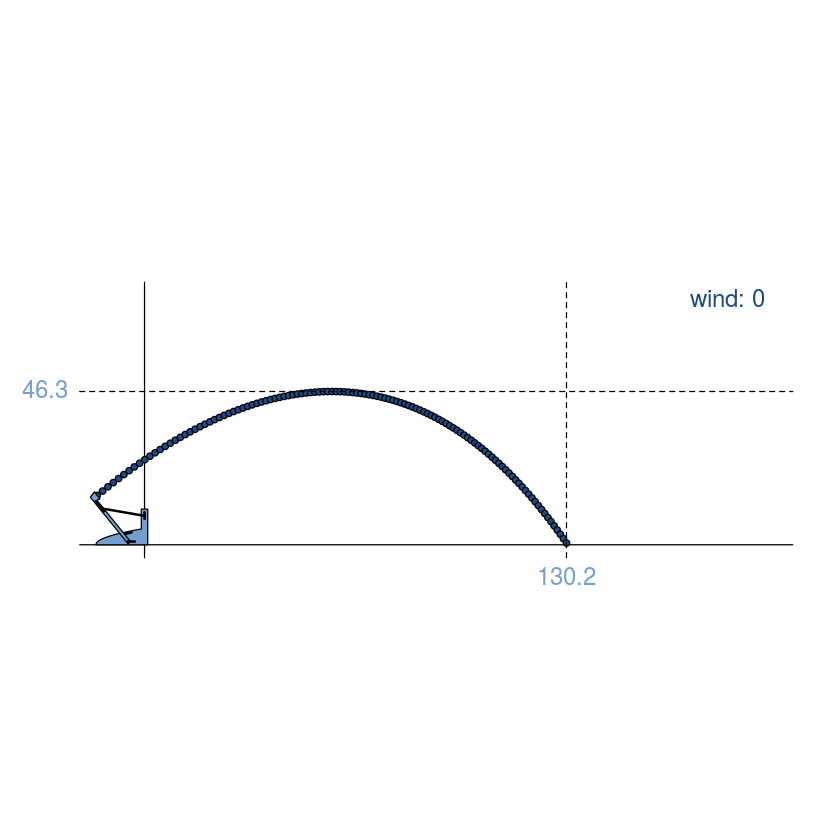

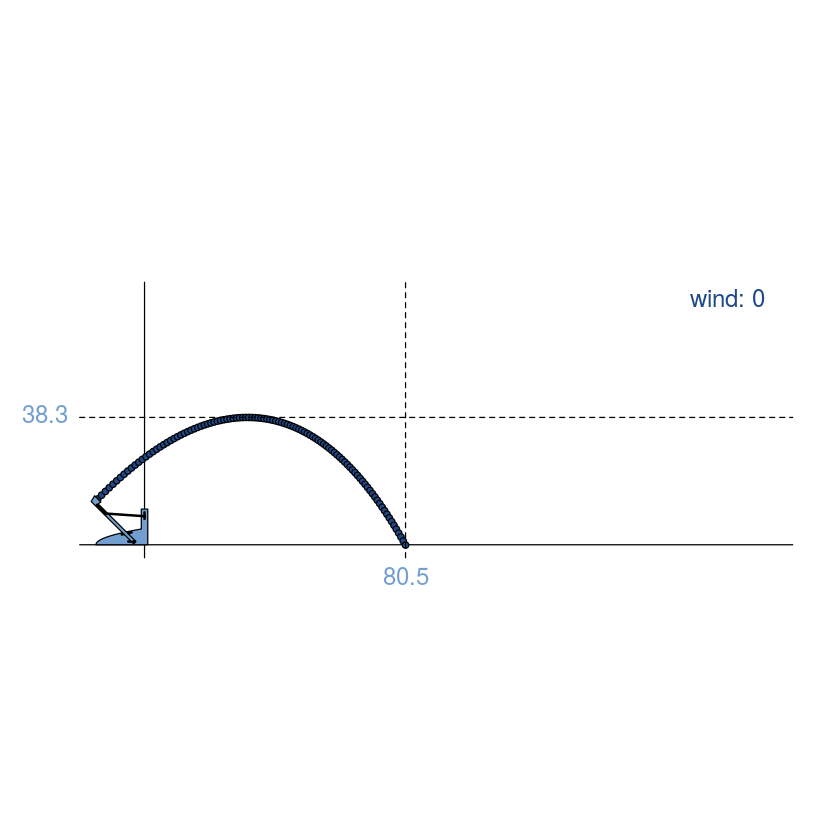

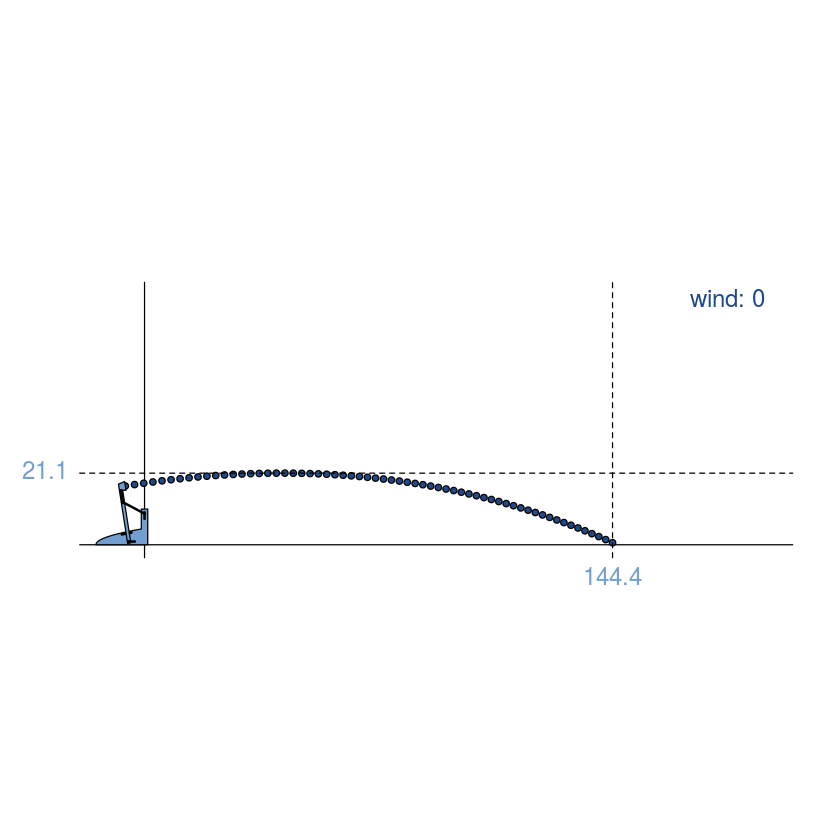

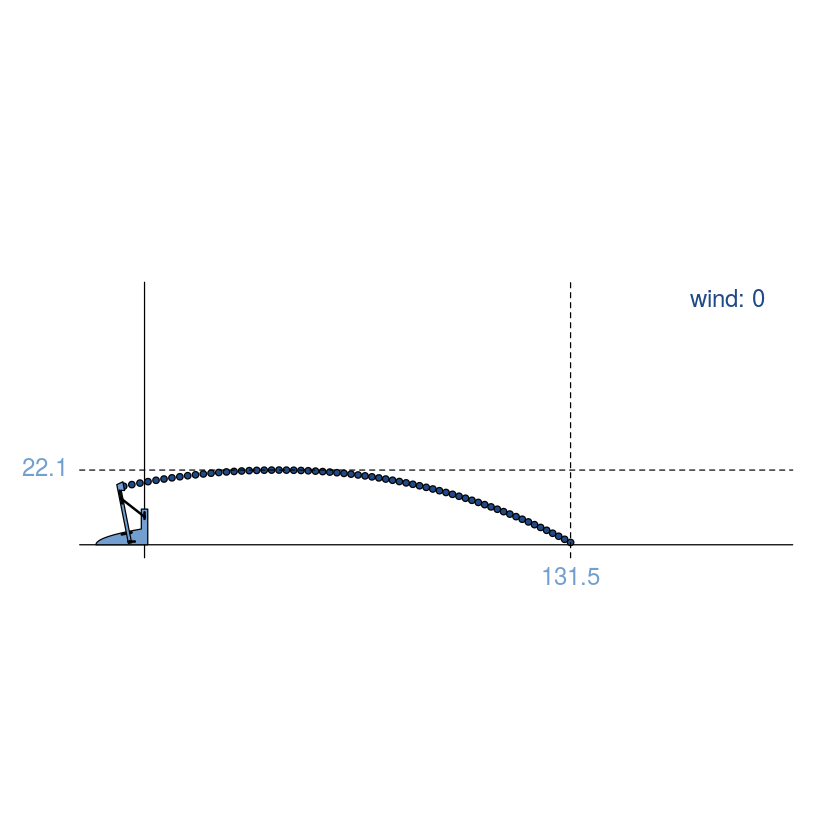

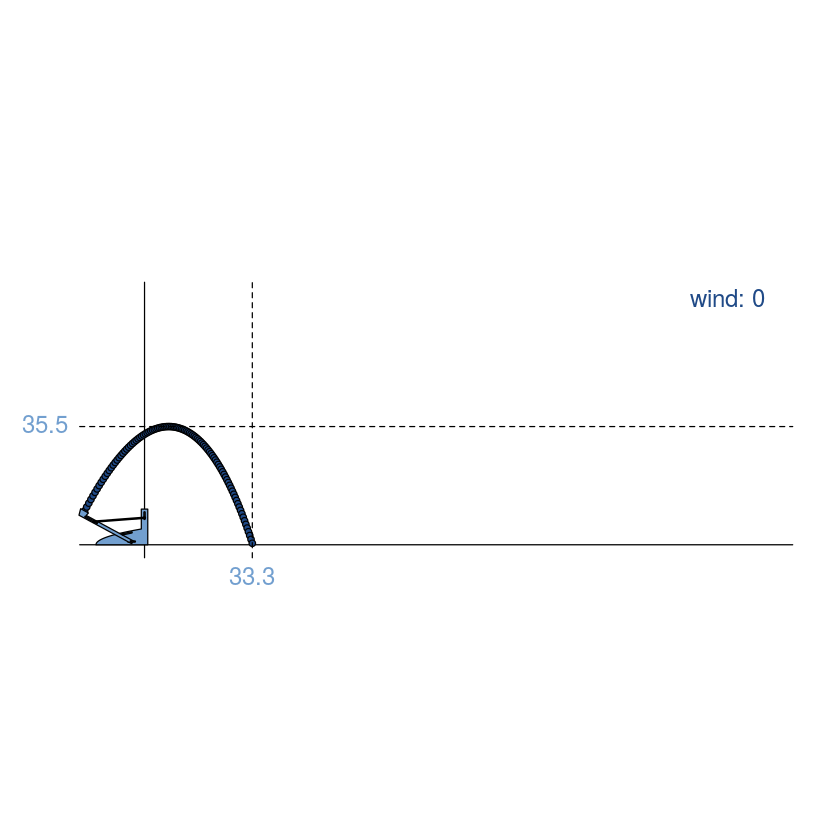

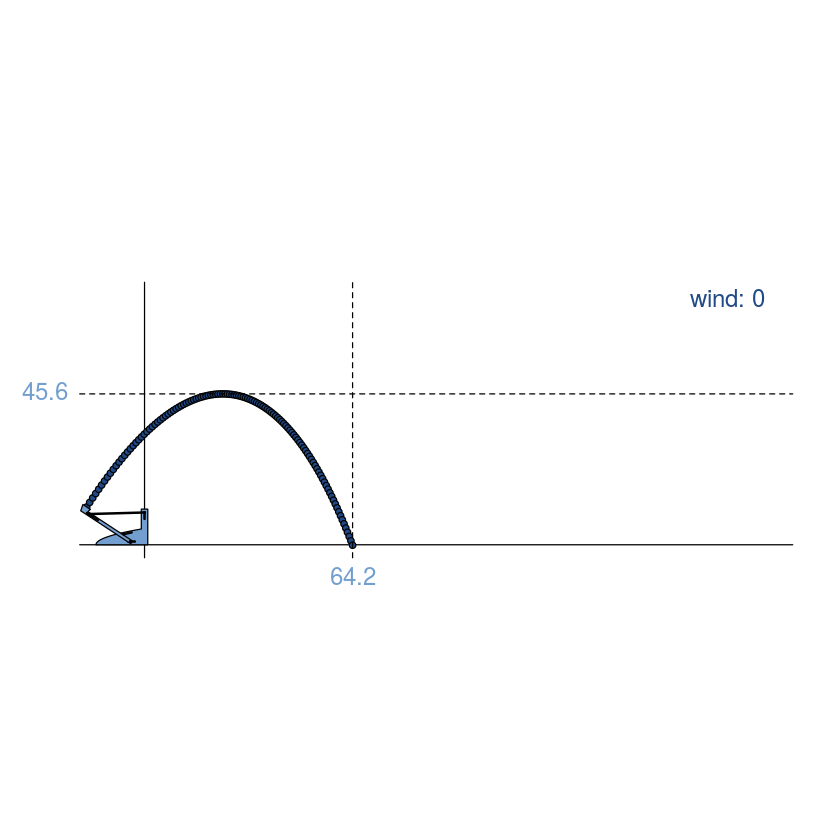

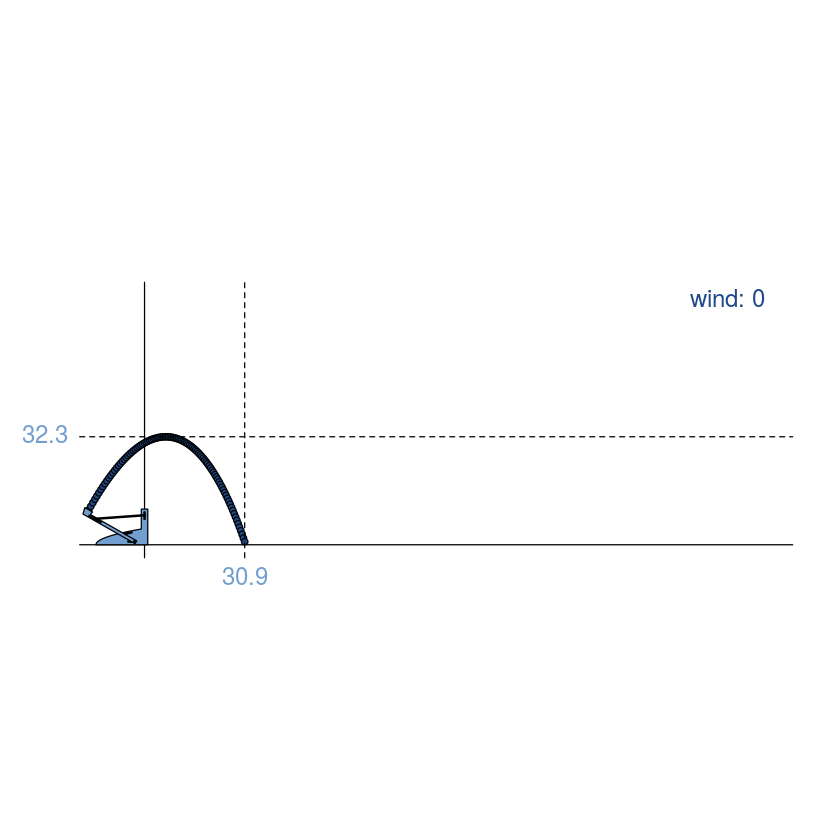

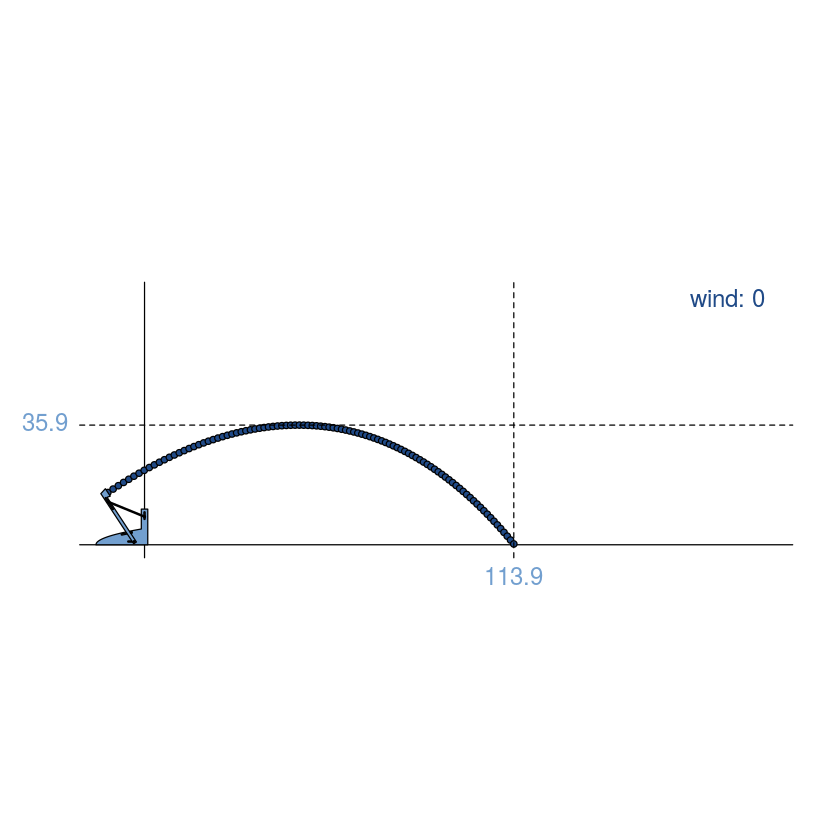

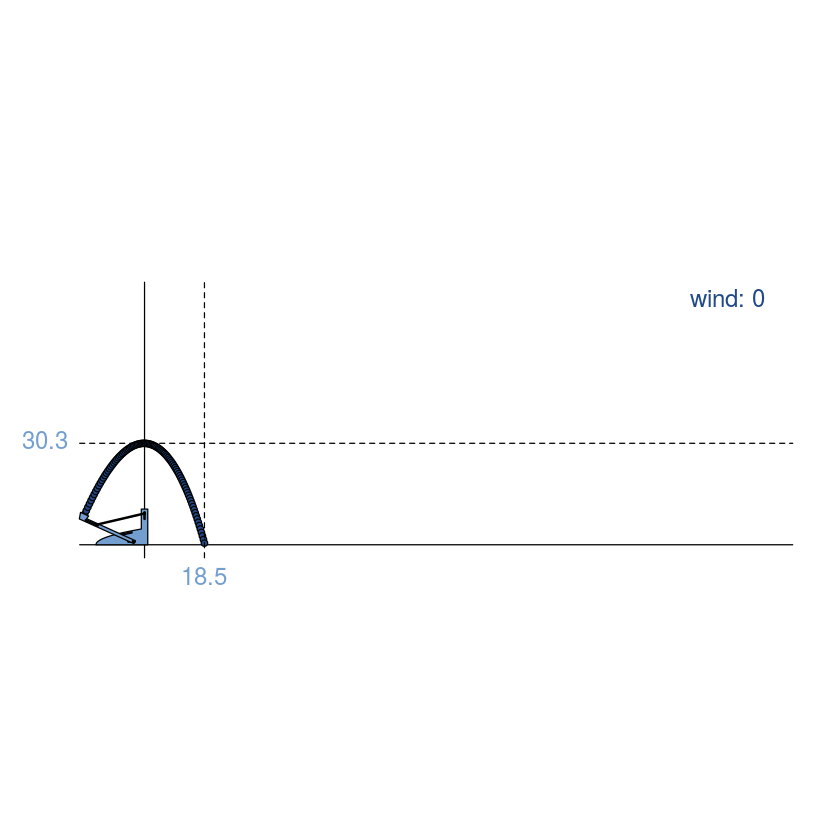

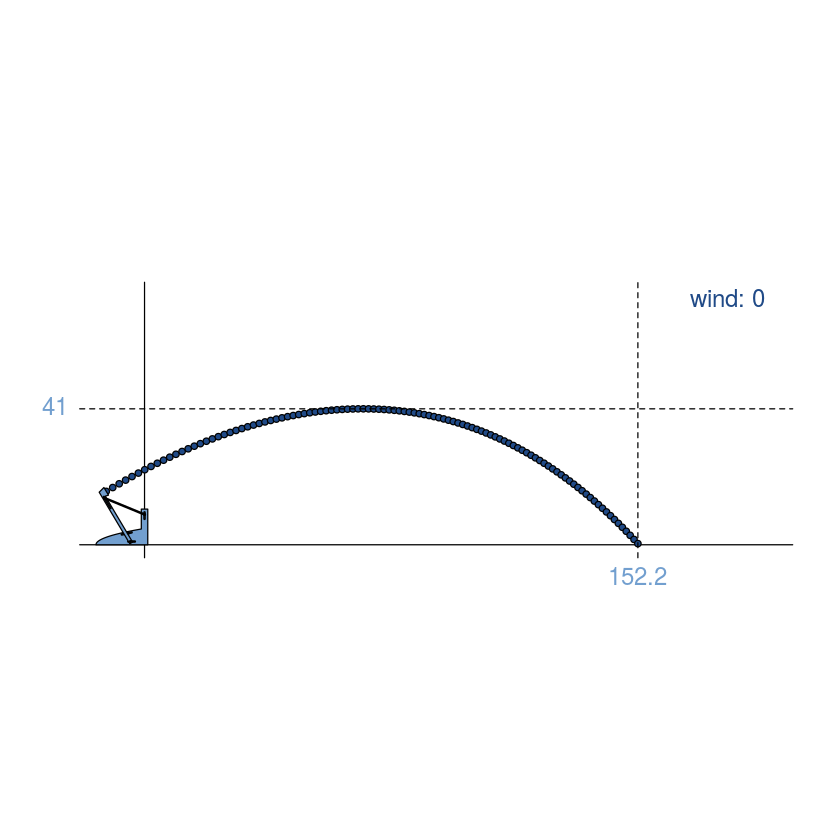

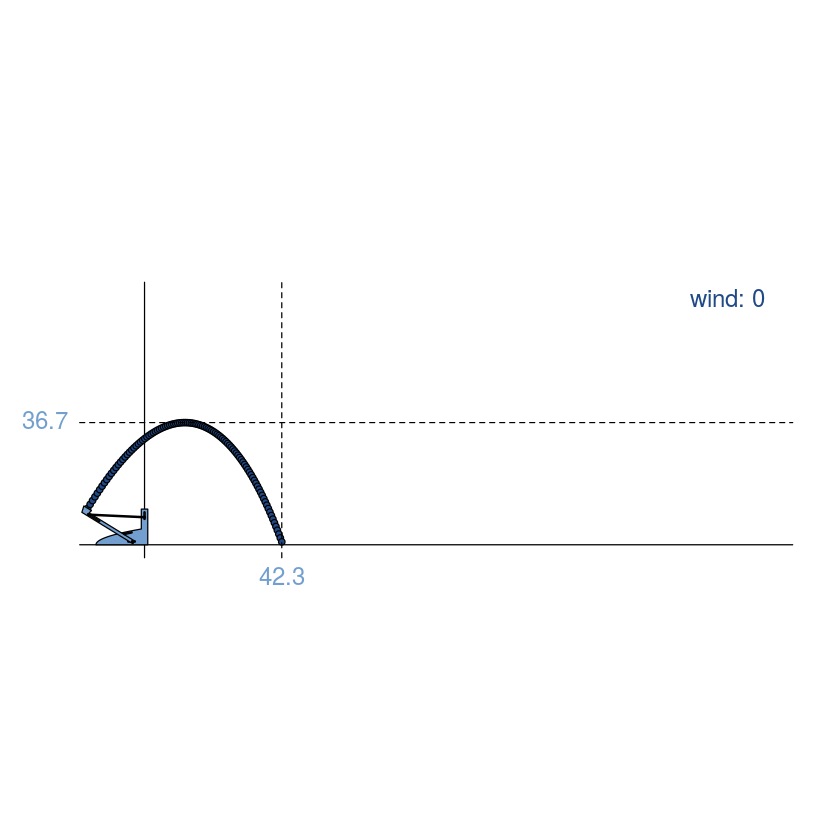

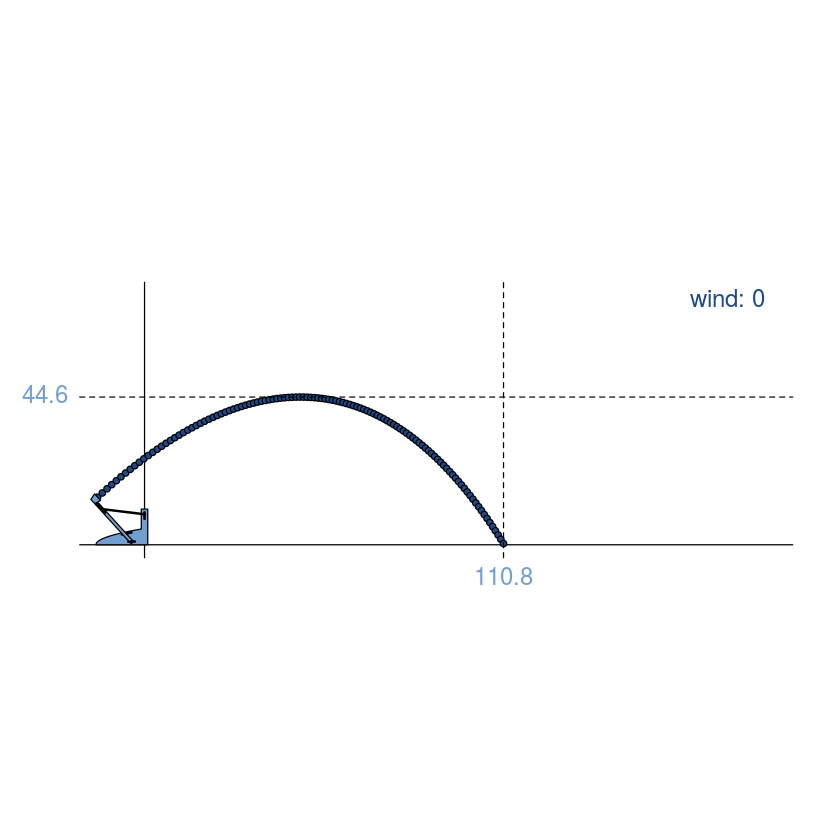

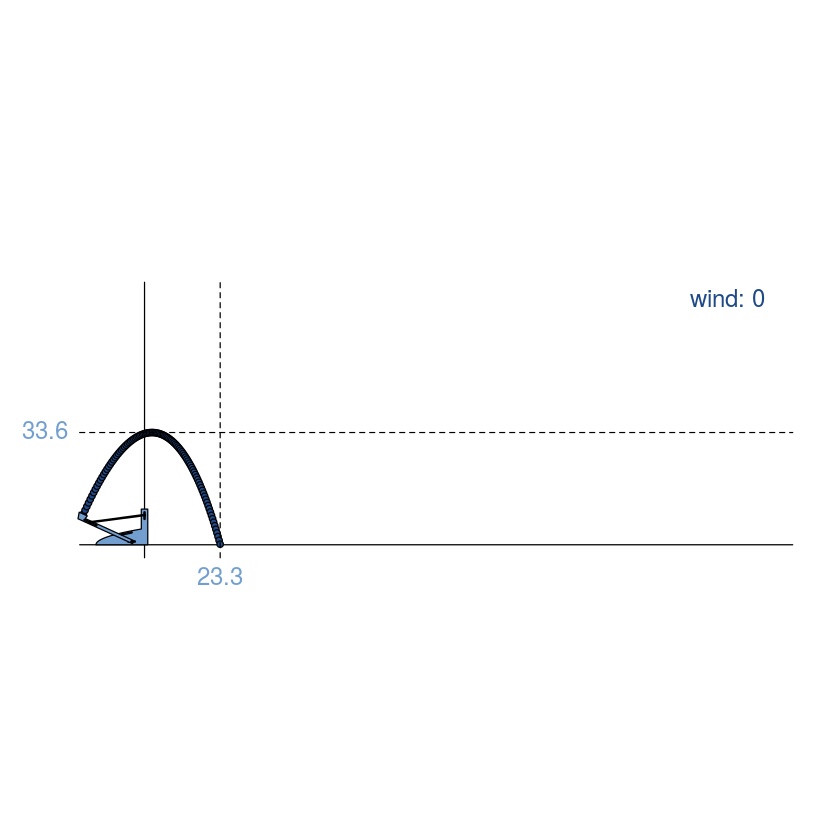

In [3]:
library(DiceDesign)
set.seed(0)
ninit <- 16
d <- 4
X0 <- lhsDesign(n = ninit, dimension = d)$design
Xopt <- maximinESE_LHS(X0, it = 10)
## you may be interested in the convergence
#plot(Xopt$critValues,type="l")
X <- Xopt$design
colnames(X) <- c("axis", "arm", "spring1", "spring2")
pairs(X)
## compute the output values
Y <- apply(X, 1, runExperiment, windFactor = 0)[1, ]

Question : Observe that the design of experiments is "space-filling". <br> Why did we chose that kind of designs? What is the current maximum? Is it far from the maximum value found by-hand?

3. Descriptive statistics. 
<br> *Question : Can you see a simple input-output relation? What can you say about the area corresponding to the maximum value?*

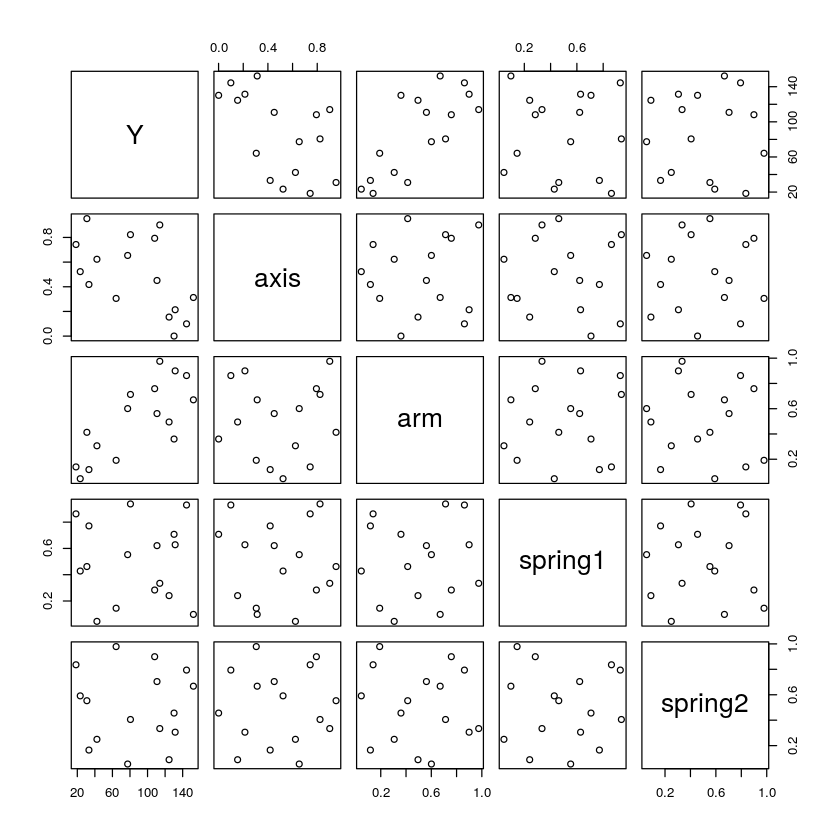

In [4]:
pairs(cbind(Y, X))

4. Regression metamodel.
<br> *Question : Try the linear models below. If you replace the simulator by one of this model, what would be the optimum? Is it far from your previous guess?*

In [5]:
myData <- data.frame(X, Y = Y)
mReg <- lm(Y ~ ., data = myData)
summary(mReg)
mReg2 <- lm(Y~ . + I(axis^2) + I (arm^2) + I (spring1^2) + I(spring2^2), data = myData)
summary(mReg2)
mStep <- step(object = mReg, scope = mReg2, direction = "both", k = log(length(Y)))
summary(mStep)


Call:
lm(formula = Y ~ ., data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-24.142  -8.162   1.139   7.744  22.642 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    71.46      13.94   5.125 0.000331 ***
axis          -88.68      13.14  -6.750 3.16e-05 ***
arm           124.72      13.36   9.338 1.46e-06 ***
spring1       -20.76      13.38  -1.552 0.149009    
spring2        13.02      13.45   0.968 0.353972    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.21 on 11 degrees of freedom
Multiple R-squared:  0.9204,	Adjusted R-squared:  0.8915 
F-statistic: 31.81 on 4 and 11 DF,  p-value: 5.453e-06



Call:
lm(formula = Y ~ . + I(axis^2) + I(arm^2) + I(spring1^2) + I(spring2^2), 
    data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.237  -8.237   3.625   6.788  14.355 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)    45.360     31.877   1.423    0.198  
axis          -98.634     63.213  -1.560    0.163  
arm           209.840     61.157   3.431    0.011 *
spring1         7.199     61.160   0.118    0.910  
spring2        56.941     63.897   0.891    0.402  
I(axis^2)      10.342     63.587   0.163    0.875  
I(arm^2)      -86.986     58.170  -1.495    0.178  
I(spring1^2)  -26.967     58.430  -0.462    0.658  
I(spring2^2)  -39.573     60.865  -0.650    0.536  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.99 on 7 degrees of freedom
Multiple R-squared:  0.944,	Adjusted R-squared:   0.88 
F-statistic: 14.75 on 8 and 7 DF,  p-value: 0.0009762


Start:  AIC=94.96
Y ~ axis + arm + spring1 + spring2

          Df Sum of Sq     RSS     AIC
- spring2  1     216.6  2760.2  93.498
<none>                  2543.7  94.963
- spring1  1     556.8  3100.4  95.358
- axis     1   10535.7 13079.3 118.390
- arm      1   20165.9 22709.6 127.218

Step:  AIC=93.5
Y ~ axis + arm + spring1

          Df Sum of Sq     RSS     AIC
<none>                  2760.2  93.498
- spring1  1     553.3  3313.5  93.648
- axis     1   10475.6 13235.8 115.807
- arm      1   19961.6 22721.8 124.454



Call:
lm(formula = Y ~ axis + arm + spring1, data = myData)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.270  -7.046  -1.623   7.777  21.974 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    78.38      11.93   6.568 2.66e-05 ***
axis          -88.41      13.10  -6.749 2.05e-05 ***
arm           123.69      13.28   9.316 7.66e-07 ***
spring1       -20.69      13.34  -1.551    0.147    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.17 on 12 degrees of freedom
Multiple R-squared:  0.9137,	Adjusted R-squared:  0.8921 
F-statistic: 42.33 on 3 and 12 DF,  p-value: 1.169e-06


5. Now, let us try the EGO method (Bayesian optimization)
<br> *Question : Recall its main principles.*


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -72.03299 -74.31601 -74.48817 -75.59684 -76.55966 



Warning message:
“executing %dopar% sequentially: no parallel backend registered”


N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       72.033  |proj g|=       0.7799
At iterate     1  f =       70.957  |proj g|=        1.0424
At iterate     2  f =       70.529  |proj g|=        1.4292
At iterate     3  f =       70.249  |proj g|=       0.90258
At iterate     4  f =       70.226  |proj g|=       0.67043
At iterate     5  f =       70.177  |proj g|=        1.0447
At iterate     6  f =       70.164  |proj g|=       0.11277
At iterate     7  f =       70.164  |proj g|=      0.014625
At iterate     8  f =       70.164  |proj g|=     0.0095423
At iterate     9  f =       70.164  |proj g|=     0.0024523
At iterate    10  f =       70.164  |proj g|=    0.00025098

iterations 10
function evaluations 14
segments explored during Cauchy searches 13
BFGS updates skipped 0
active bounds at final generalized Cauchy point 2
norm of the final projected gradient 0.000250978
final function value 70.1637

F = 70.1637
final

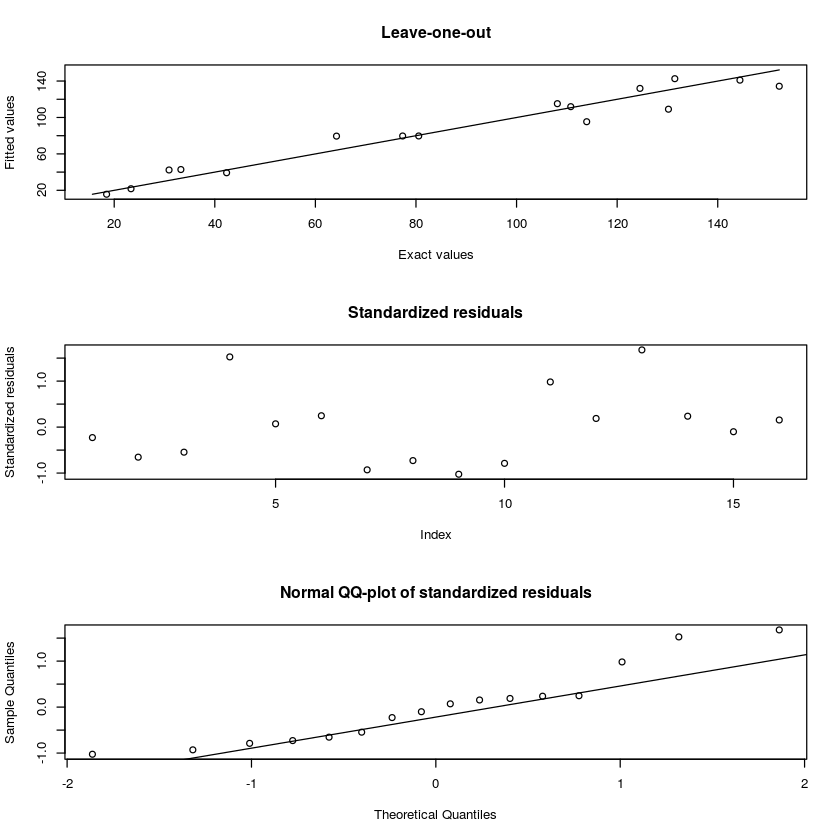

In [6]:
library(DiceKriging)
mGP0 <- km(~ 1, design = X, response = Y, multistart = 5)
print(mGP0)   # display model
plot(mGP0)    # visual model validation

*Questions: What is the role of the argument 'multistart'? What can you say about the performance and the validity of this first model?*

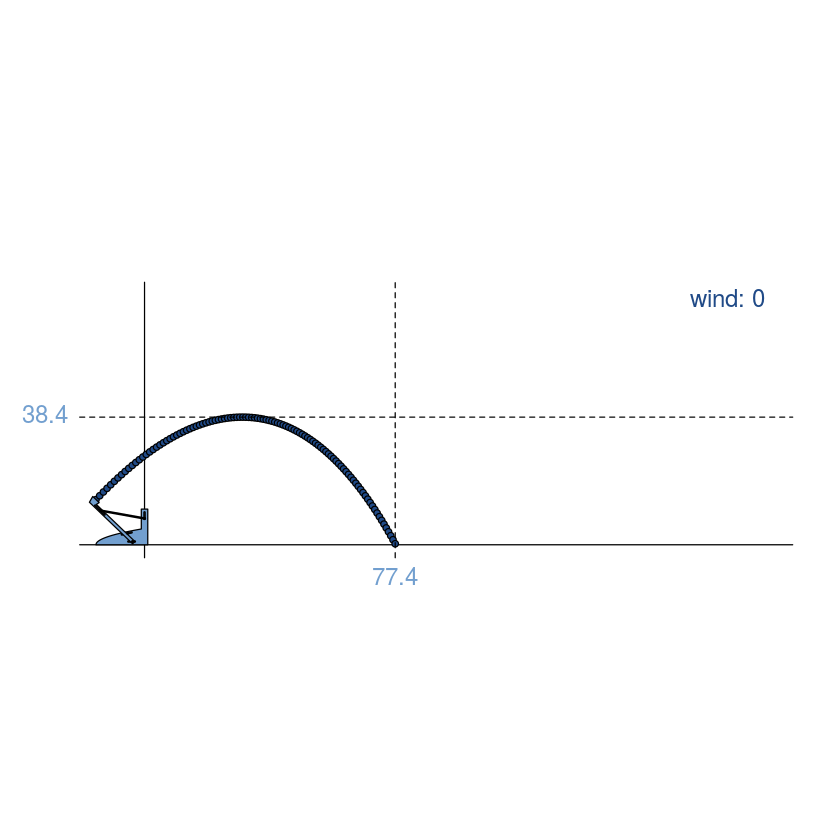

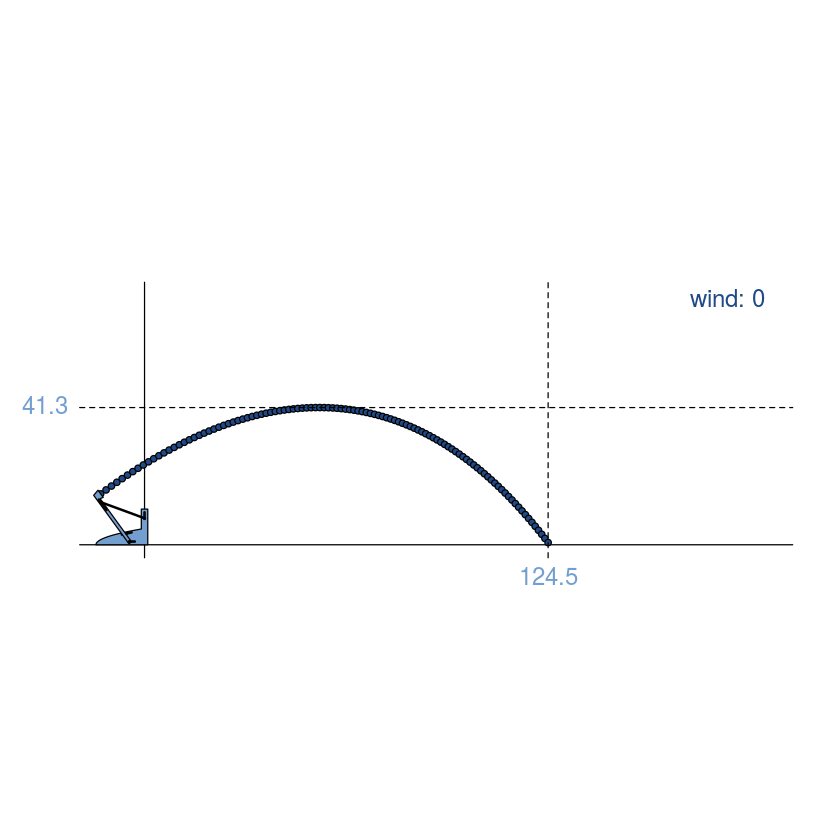

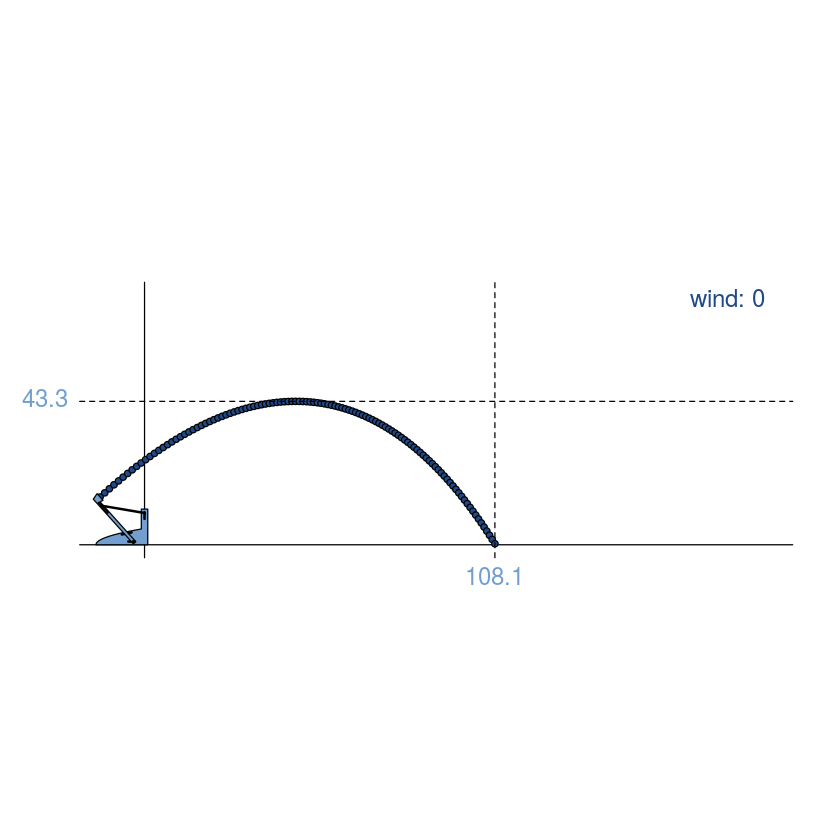

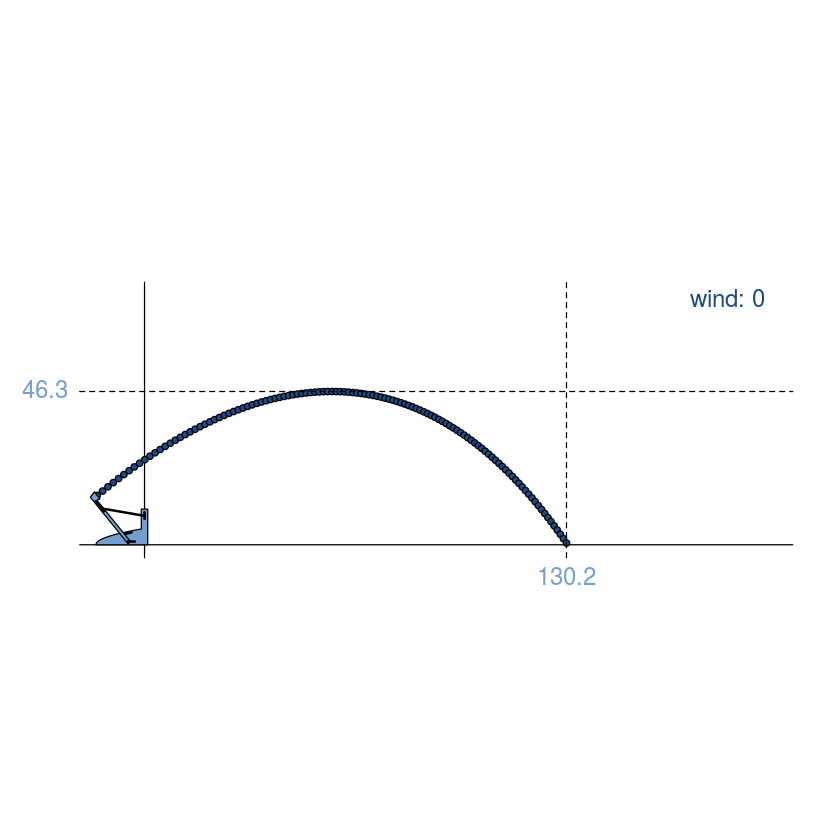

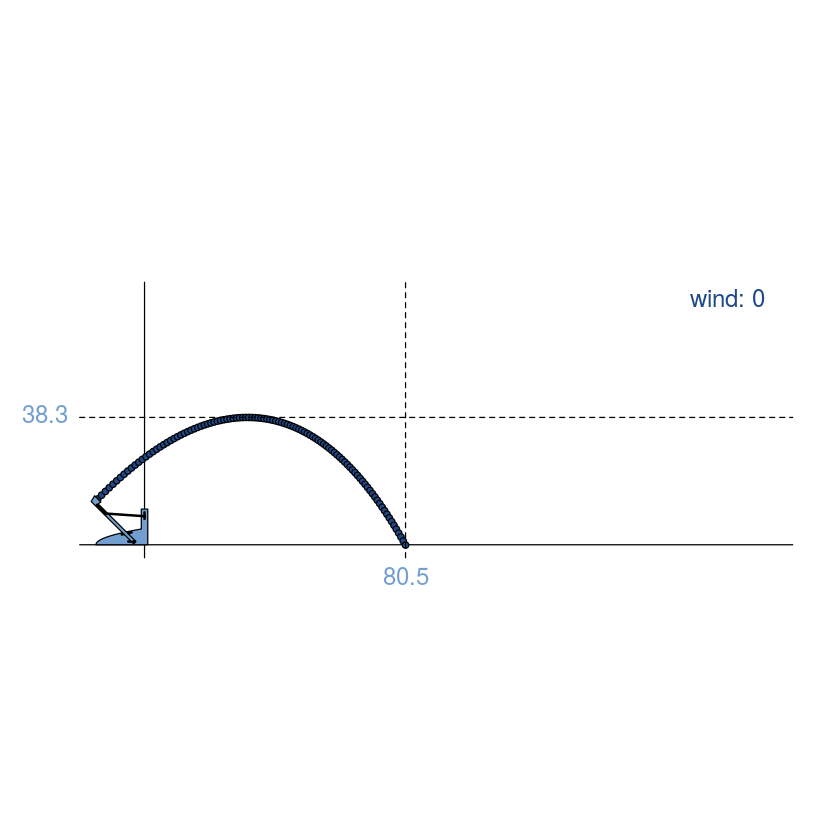

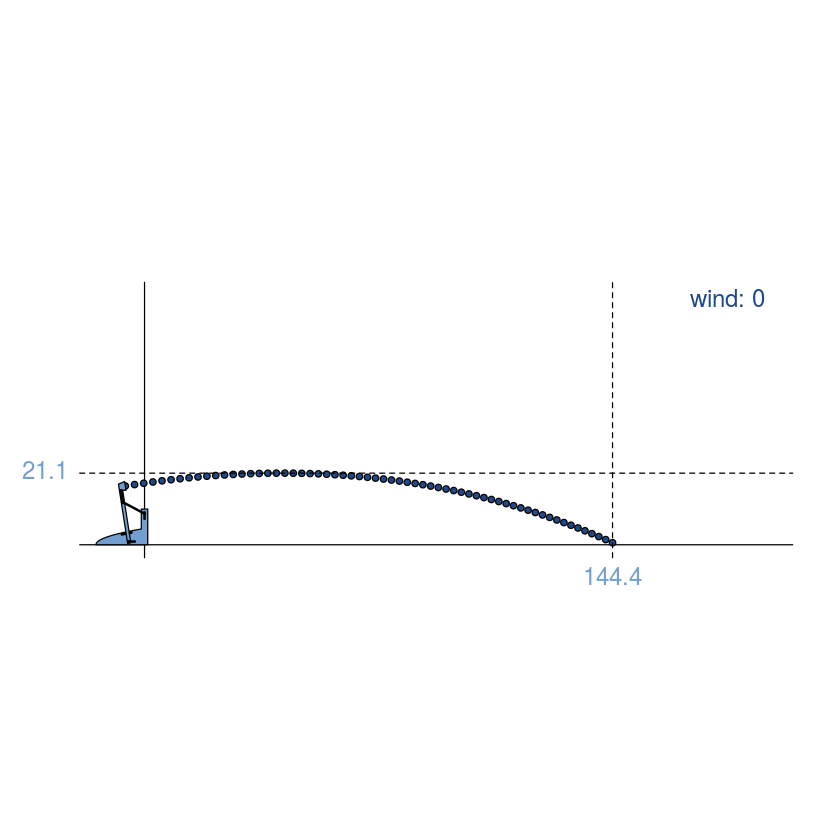

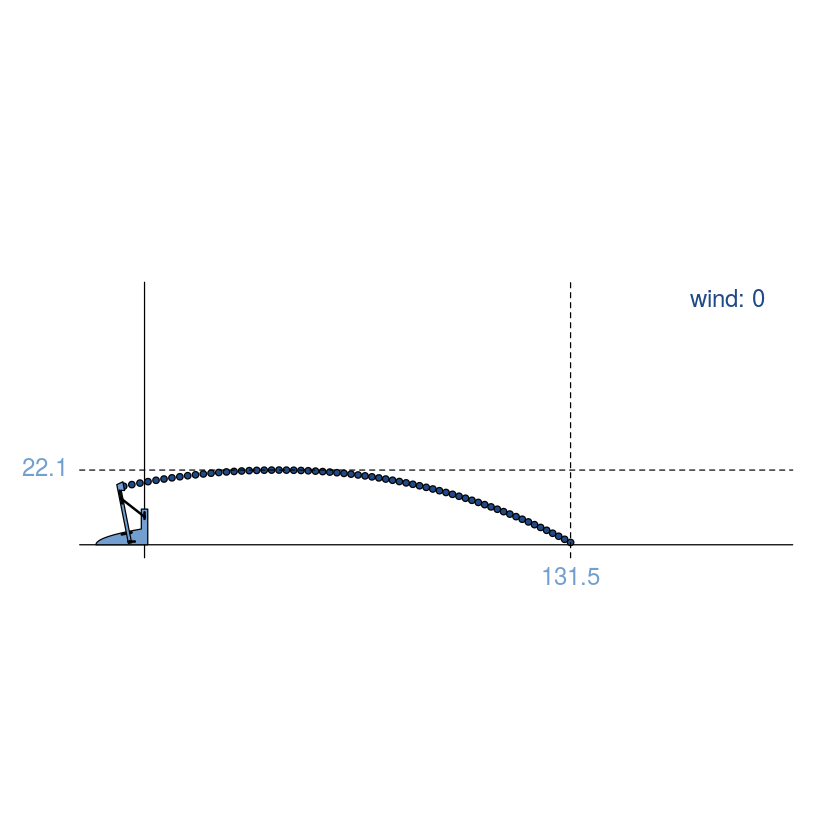

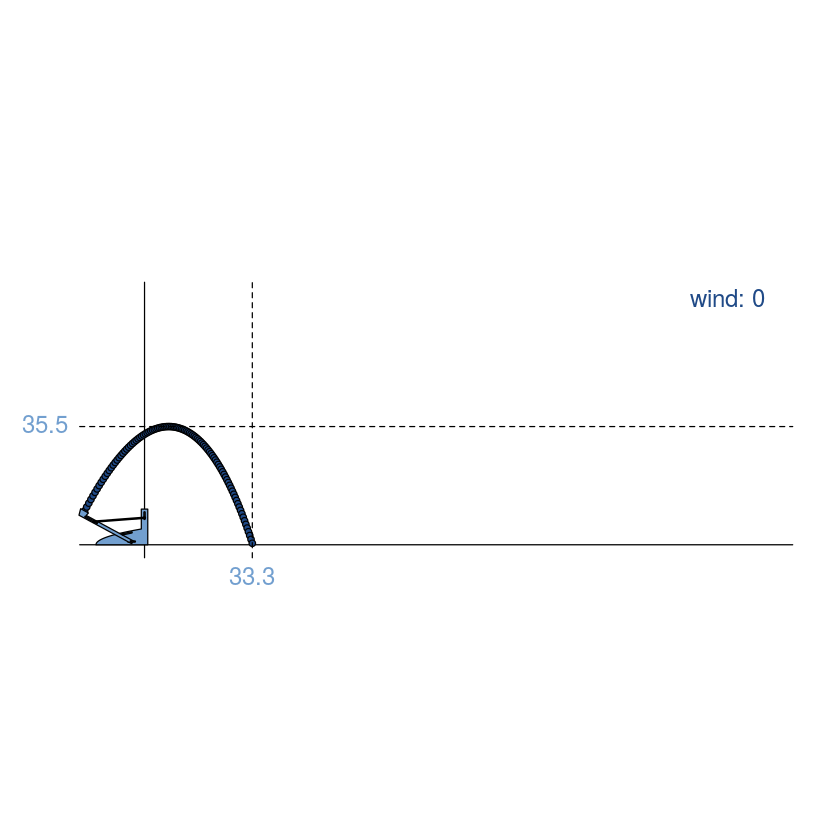

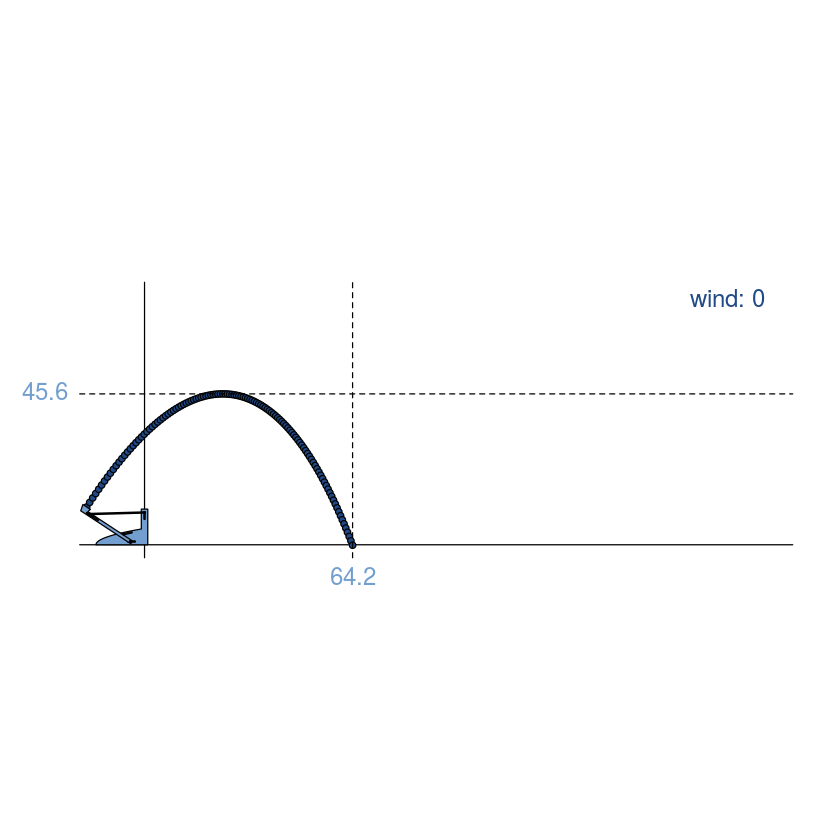

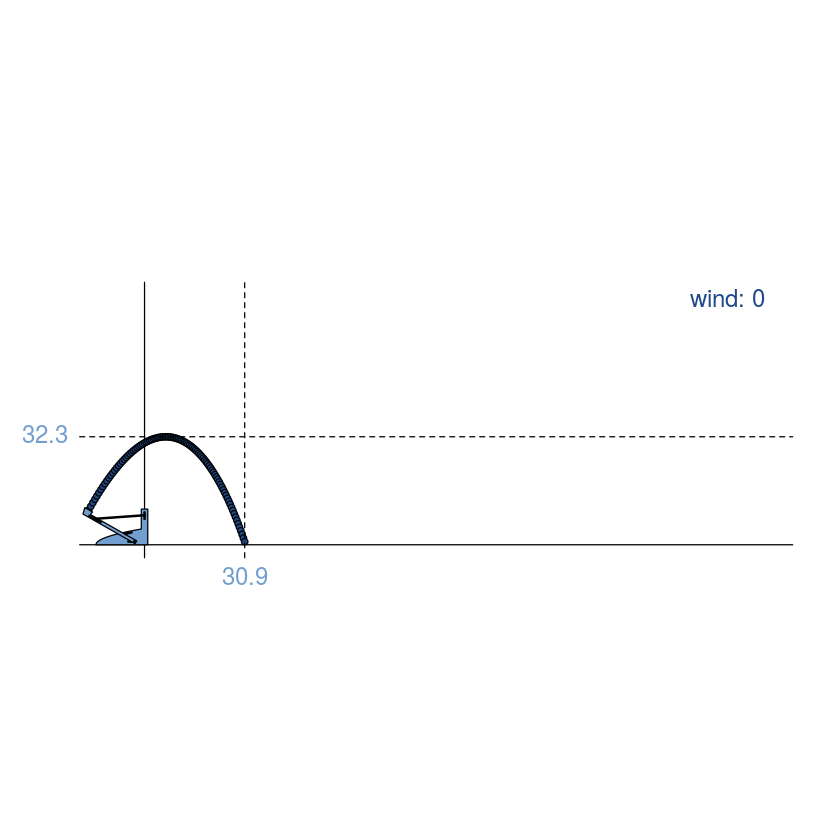

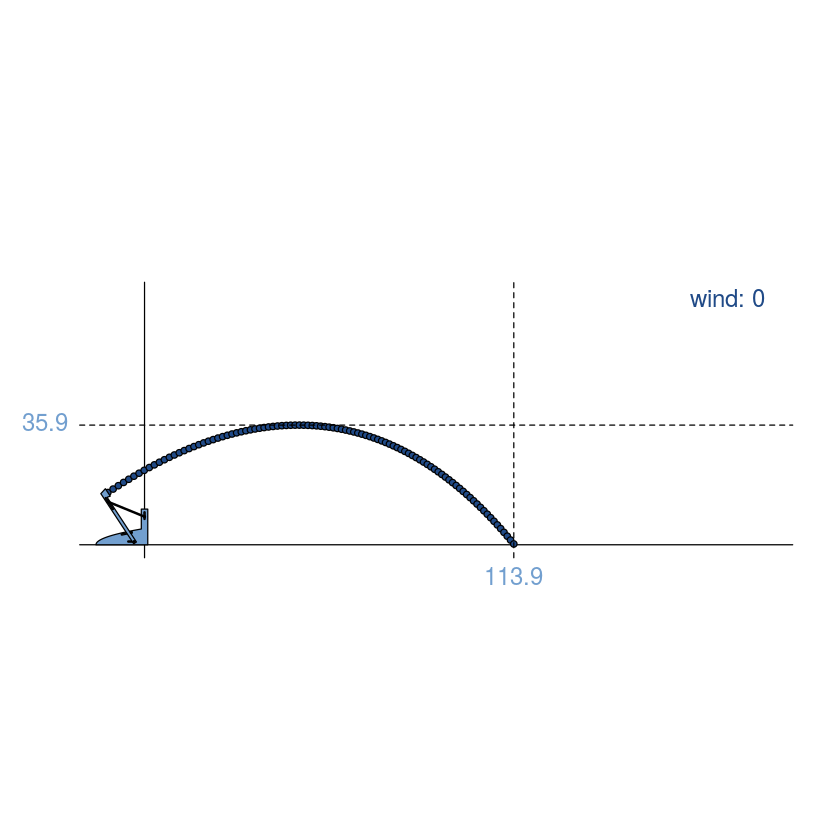

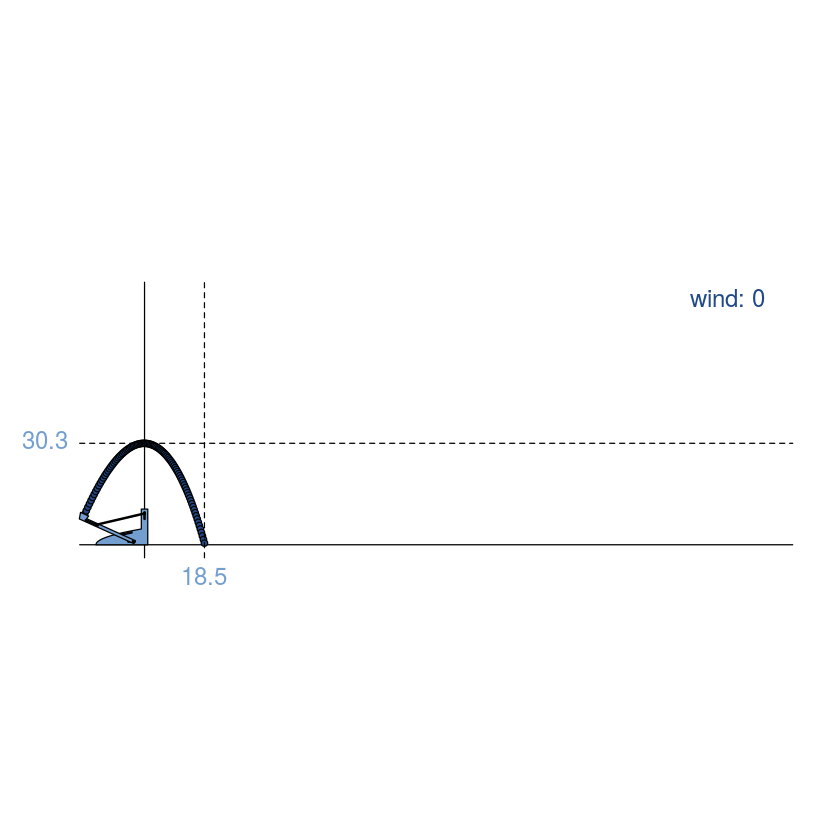

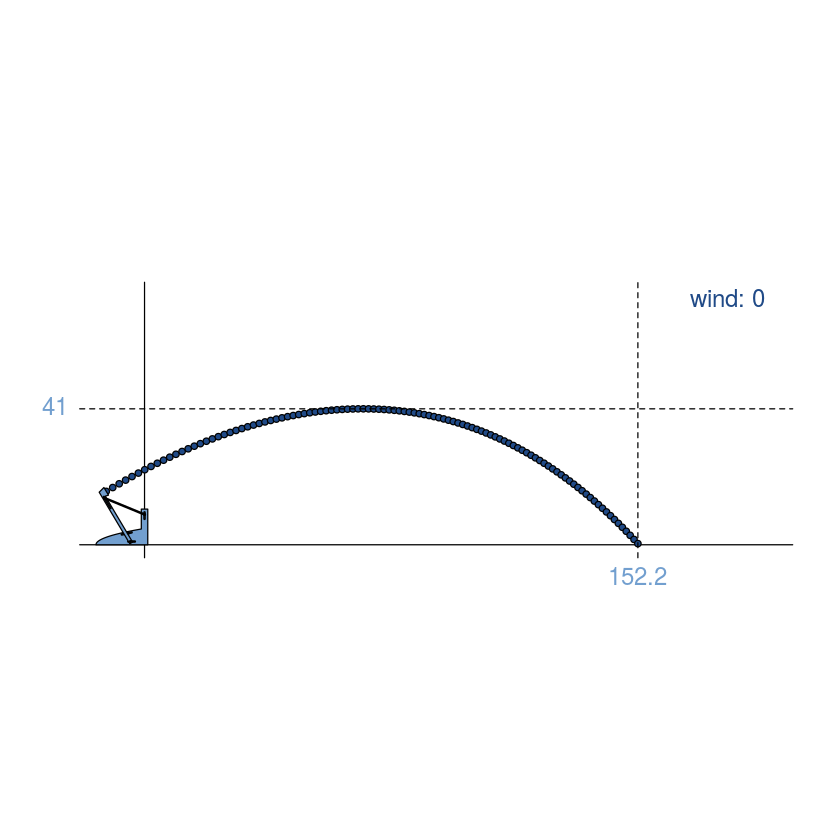

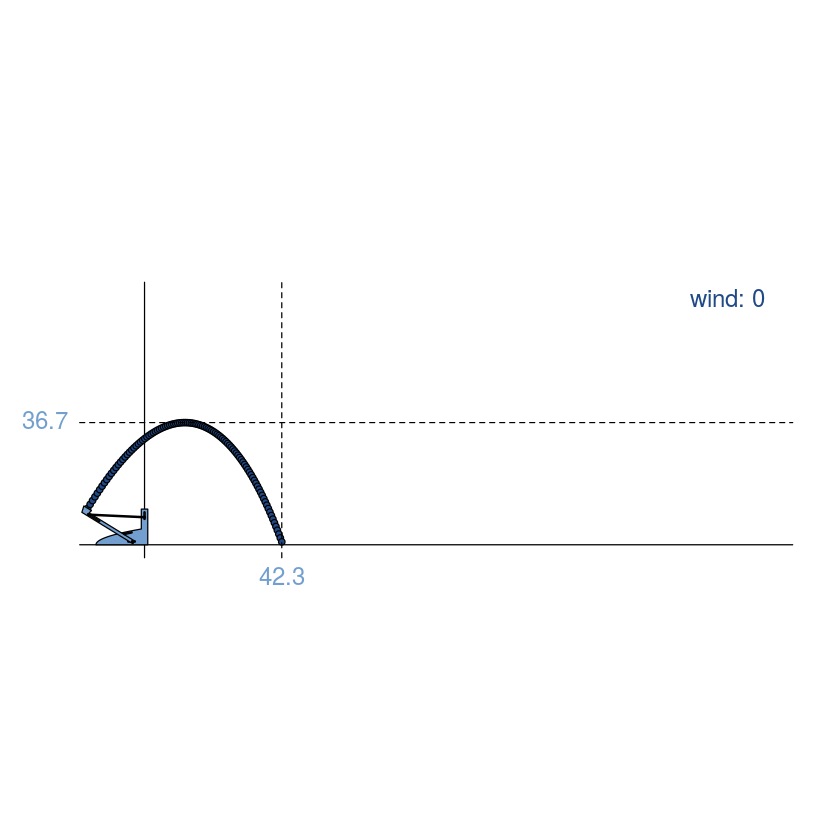

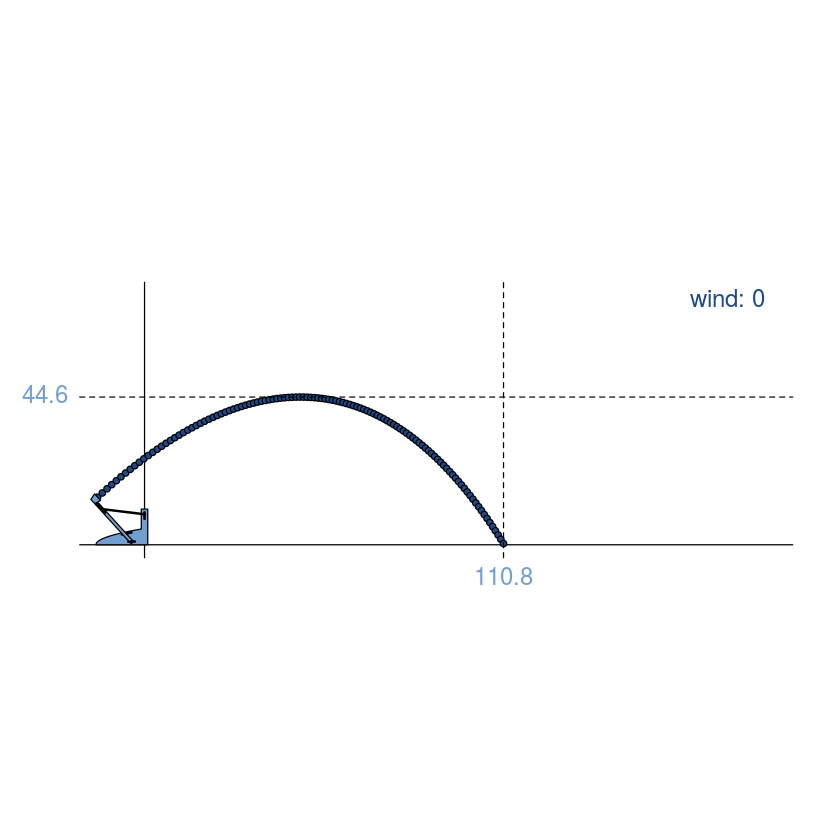


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -71.14787 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       71.148  |proj g|=       0.7432
At iterate     1  f =        70.98  |proj g|=       0.70941
At iterate     2  f =       70.466  |proj g|=        1.0007
At iterate     3  f =       70.307  |proj g|=        1.3541
At iterate     4  f =       70.192  |proj g|=        1.3544
At iterate     5  f =       70.165  |proj g|=       0.14224
At iterate     6  f =       70.164  |proj g|=      0.090076
At iterate     7  f =       70.164  |proj g|=      0.040161
At iterate     8  f =       70.164  |proj g|=     

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 2.433245e+01

Parameters at the Solution (parameter, gradient):

 X[ 1] :	0.000000e+00	G[ 1] :	-2.086454e+01
 X[ 2] :	6.970573e-01	G[ 2] :	1.984024e-06
 X[ 3] :	0.000000e+00	G[ 3] :	-1.706750e+00
 X[ 4] :	9.828652e-01	G[ 4] :	-2.960833e-07

Solution Found Generation 12
Number of Generations Run 12

Tue Oct 27 13:53:14 2020
Total run time : 0 hours 0 minutes and 0 seconds


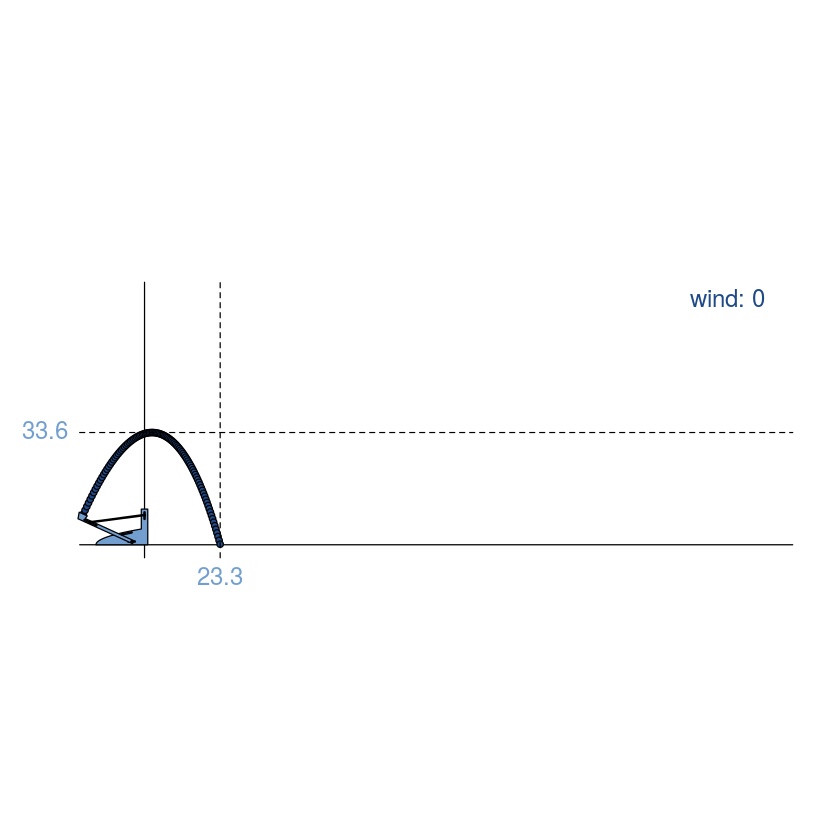

Expected improvement was: 24.33 
Actual improvement is: 24.59 
   (>0 means the new point is better, <0 means it is worse)

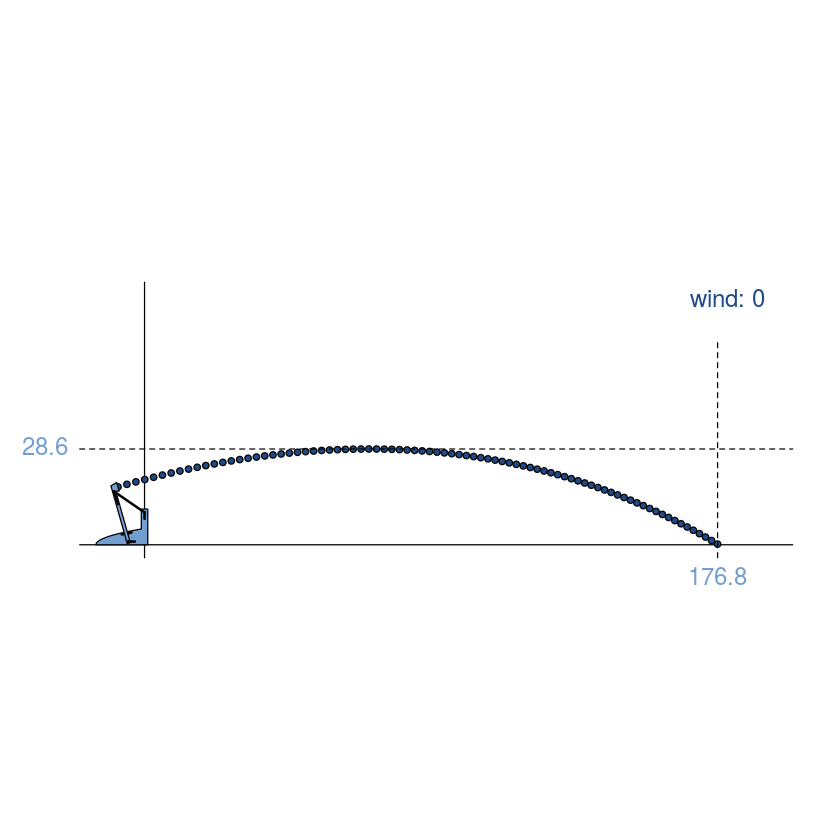

In [7]:
library(DiceOptim)

## We first transform the problem to a minimization one
runExperimentFun <- function(x) {
    - runExperiment(x, wind = 0)[1]
}
Y <- apply(X, 1, runExperimentFun)
mGP0 <- km(~ 1, design = X, response = Y)

## Step 1 ##
oEGO <- max_EI(model = mGP0, lower = rep(0, d), upper = rep(1, d))
newX <- oEGO$par
newy <- runExperimentFun(newX)

cat("Expected improvement was:", round(oEGO$value, 2),
    "\nActual improvement is:", round(min(Y) - newy, 2),
    "\n   (>0 means the new point is better, <0 means it is worse)")


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -76.50281 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       76.503  |proj g|=       1.2362
At iterate     1  f =       75.715  |proj g|=       0.79946
At iterate     2  f =       74.791  |proj g|=        1.3557
At iterate     3  f =       74.201  |proj g|=       0.59341
At iterate     4  f =       73.892  |proj g|=       0.56552
At iterate     5  f =       73.667  |proj g|=       0.71523
At iterate     6  f =       73.645  |proj g|=       0.31339
At iterate     7  f =        73.64  |proj g|=      0.048775
At iterate     8  f =        73.64  |proj g|=     

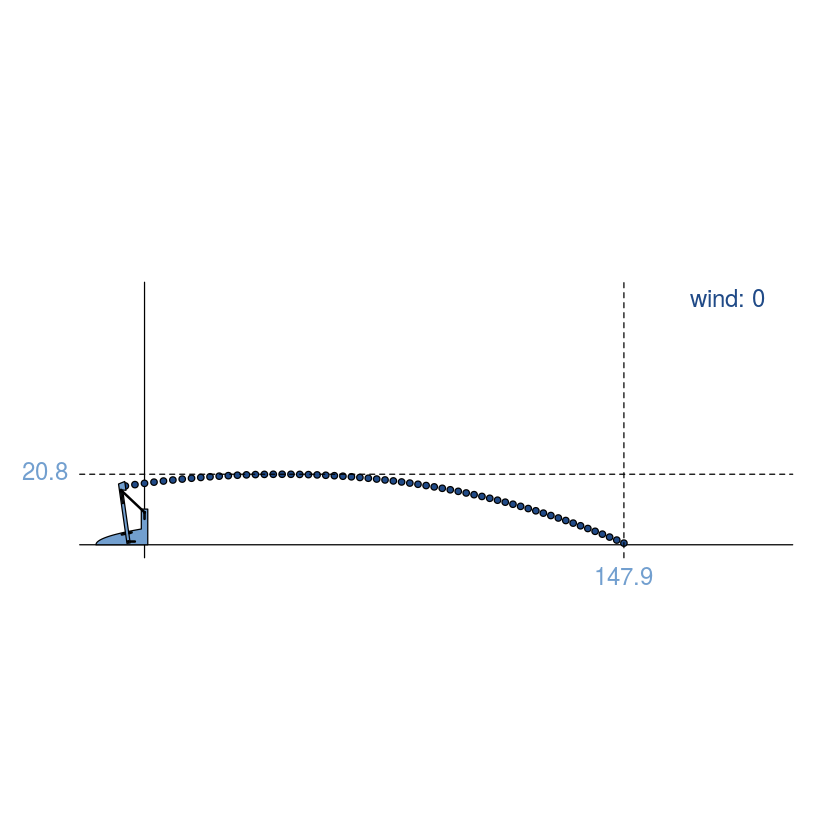

In [8]:
# Then we update the model
mGP1 <- update(mGP0, newX, newy)
# and maximize again the expected improvement: 
## Step 2 ##
oEGO <- max_EI(model = mGP1, lower = rep(0, d), upper = rep(1, d))
newX <- oEGO$par
newy <- runExperimentFun(newX)

cat("Expected improvement was:", round(oEGO$value, 2),
    "\nActual improvement is:", round(min(mGP1@y) - newy, 2),
    "\n   (>0 means the new point is better, <0 means its worst)")



Tue Oct 27 13:53:15 2020
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+00 
 0.000000e+00   <=  X2   <=    1.000000e+00 
 0.000000e+00   <=  X3   <=    1.000000e+00 
 0.000000e+00   <=  X4   <=    1.000000e+00 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	5
	(2) Uniform Mutation.................. 	6
	(3) Boundary Mutation................. 	6
	(4) Non-Uniform Mutation.............. 	6
	(5) Polytope Crossover................ 	6
	(6) Simple Crossover.................. 	6
	(7) Whole Non-Uniform Mutation........ 	6
	(8) Heuristic Crossover............... 	6
	(9) Local-Minimum Crossover........... 	0

HARD Maximum Number of Generations: 12
Maximum Nonchanging Generations: 2
Population size       : 48
Convergence Tolerance: 1.000000e-21

Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Not Using Out of Bounds Individuals and Not Allowing Trespassing.


Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”



NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 2.433245e+01

Parameters at the Solution (parameter, gradient):

 X[ 1] :	0.000000e+00	G[ 1] :	-2.086453e+01
 X[ 2] :	6.970573e-01	G[ 2] :	-8.686190e-06
 X[ 3] :	0.000000e+00	G[ 3] :	-1.706750e+00
 X[ 4] :	9.828652e-01	G[ 4] :	-4.100409e-06

Solution Found Generation 12
Number of Generations Run 12

Tue Oct 27 13:53:15 2020
Total run time : 0 hours 0 minutes and 0 seconds

optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -76.34146 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       76.341  |proj g|=       1.4203
At iterate     1  f =       7

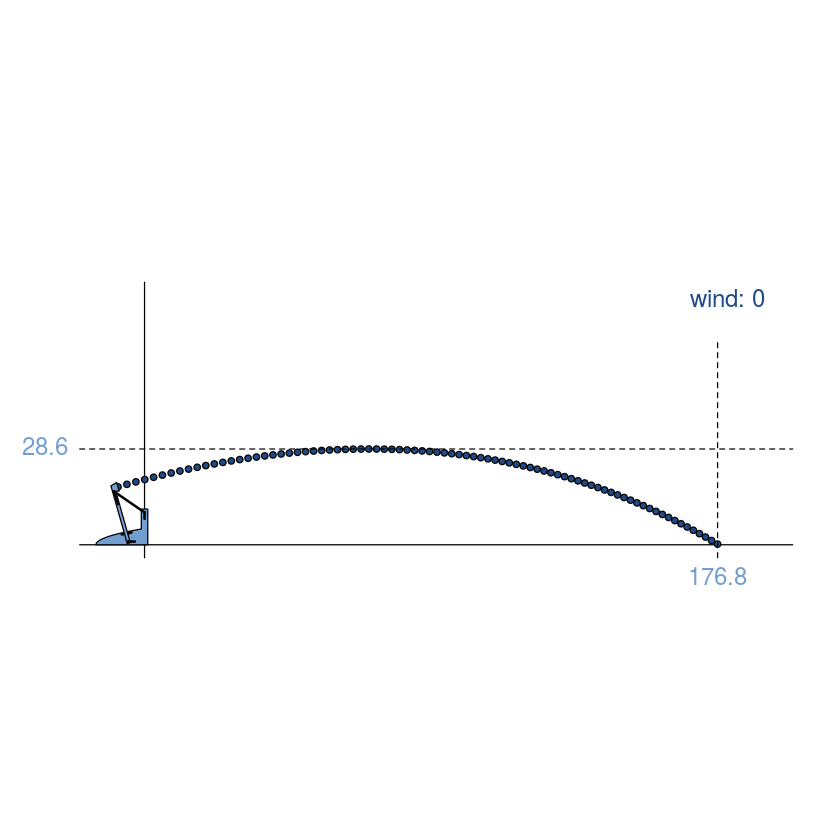


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -83.46201 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       83.462  |proj g|=       1.3326
At iterate     1  f =       82.458  |proj g|=        1.1954
At iterate     2  f =         80.9  |proj g|=       0.36838
At iterate     3  f =       80.552  |proj g|=        1.2104
At iterate     4  f =       80.379  |proj g|=        1.5401
At iterate     5  f =       80.099  |proj g|=       0.83734
At iterate     6  f =       80.065  |proj g|=       0.22195
At iterate     7  f =       80.046  |proj g|=      0.090794
At iterate     8  f =       80.046  |proj g|=     

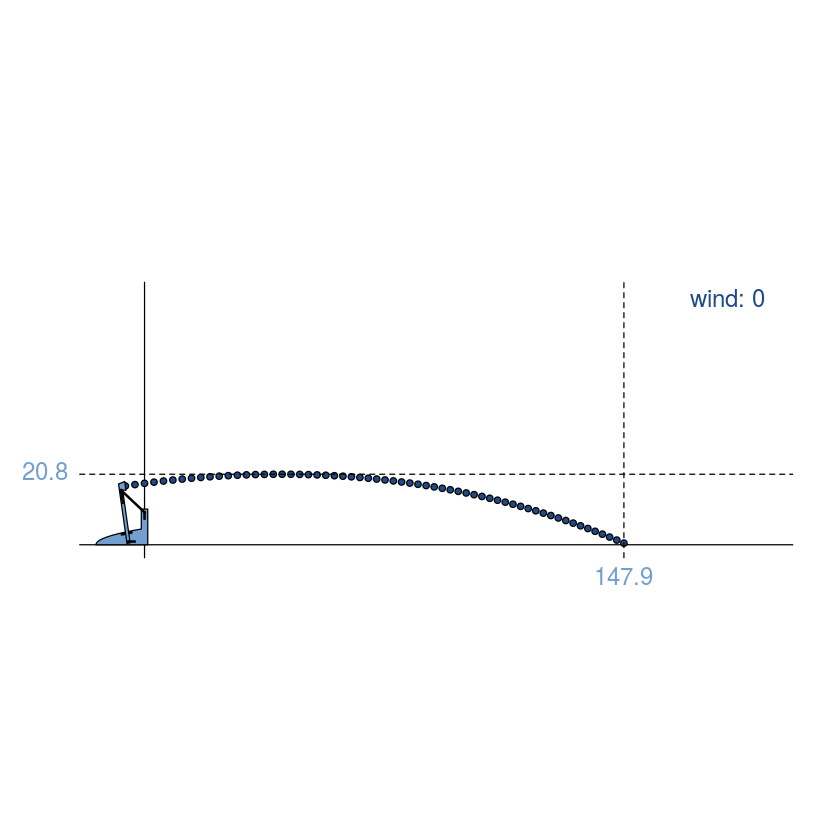


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -86.71206 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       86.712  |proj g|=       1.6225
At iterate     1  f =       85.243  |proj g|=        1.2428
At iterate     2  f =       84.739  |proj g|=        1.2185
At iterate     3  f =       82.909  |proj g|=        1.2241
At iterate     4  f =        82.81  |proj g|=       0.15079
At iterate     5  f =        82.81  |proj g|=      0.076947
At iterate     6  f =        82.81  |proj g|=      0.080797
At iterate     7  f =        82.81  |proj g|=      0.042041
At iterate     8  f =        82.81  |proj g|=    0

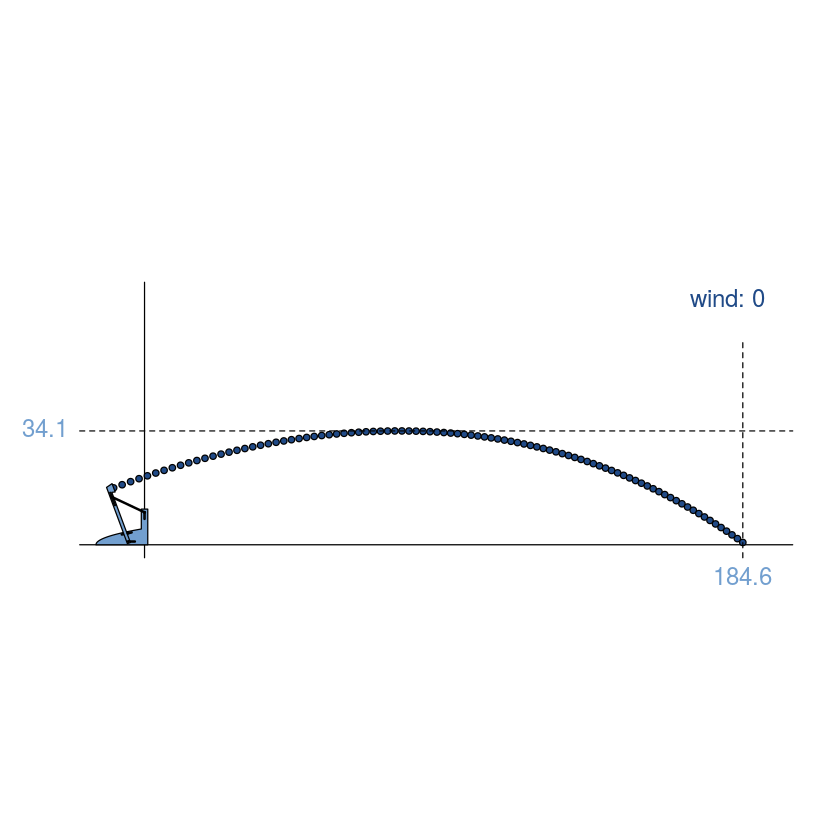


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -93.68502 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       93.685  |proj g|=       0.9567
At iterate     1  f =       90.978  |proj g|=        0.8219
At iterate     2  f =       88.032  |proj g|=       0.78035
At iterate     3  f =       87.453  |proj g|=        1.5353
At iterate     4  f =       86.874  |proj g|=         1.301
At iterate     5  f =       86.731  |proj g|=        1.2566
At iterate     6  f =       86.384  |proj g|=       0.46473
At iterate     7  f =       86.195  |proj g|=       0.58779
At iterate     8  f =       86.193  |proj g|=     

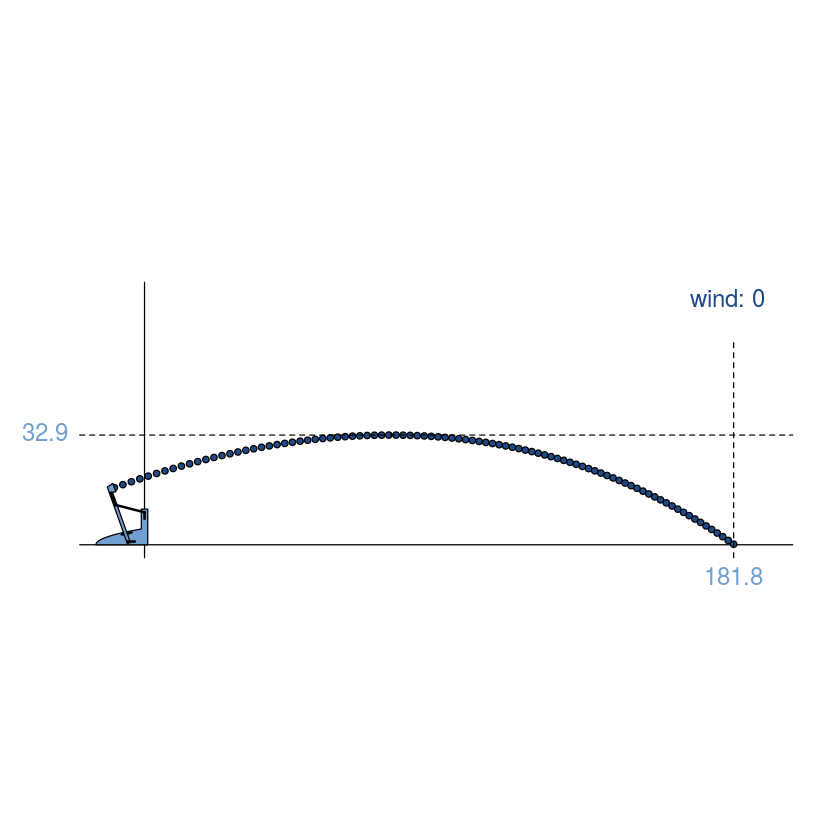


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -94.89659 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       94.897  |proj g|=       1.7056
At iterate     1  f =       93.355  |proj g|=        1.5349
At iterate     2  f =       89.562  |proj g|=        1.5076
At iterate     3  f =       88.972  |proj g|=        1.4935
At iterate     4  f =       88.658  |proj g|=        1.1859
At iterate     5  f =       88.551  |proj g|=       0.80841
At iterate     6  f =       88.529  |proj g|=       0.28303
At iterate     7  f =       88.464  |proj g|=       0.38411
At iterate     8  f =       88.281  |proj g|=     

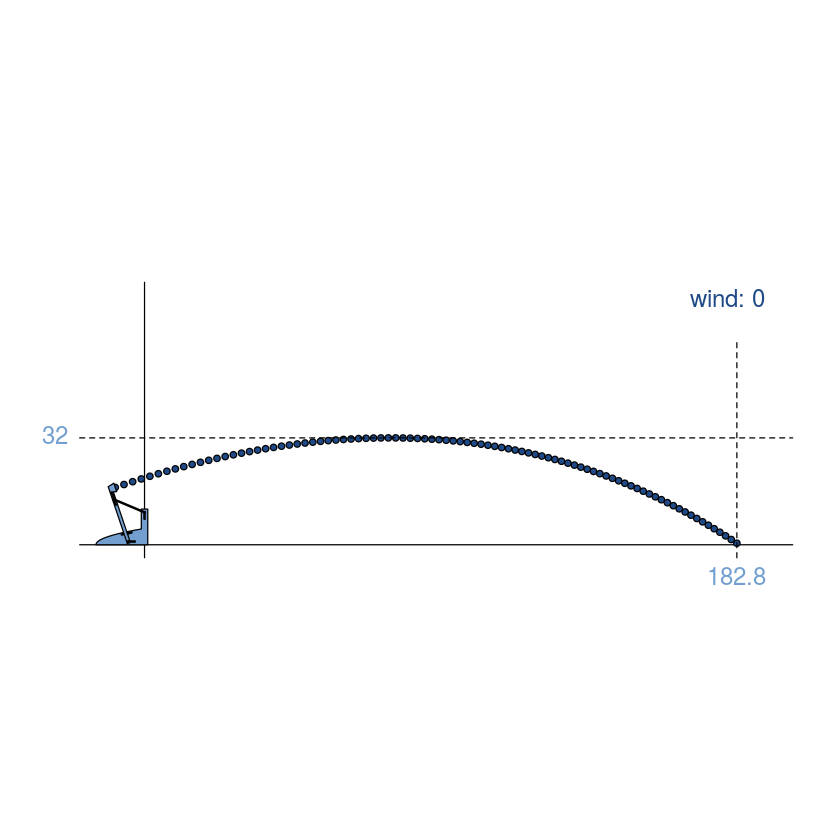


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -95.8204 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        95.82  |proj g|=        1.237
At iterate     1  f =        93.66  |proj g|=        1.1025
At iterate     2  f =       91.422  |proj g|=       0.84261
At iterate     3  f =       91.233  |proj g|=        1.4788
At iterate     4  f =        90.72  |proj g|=        1.4804
At iterate     5  f =       90.542  |proj g|=       0.14525
At iterate     6  f =       90.509  |proj g|=       0.16776
At iterate     7  f =       90.509  |proj g|=      0.068051
At iterate     8  f =       90.509  |proj g|=     0

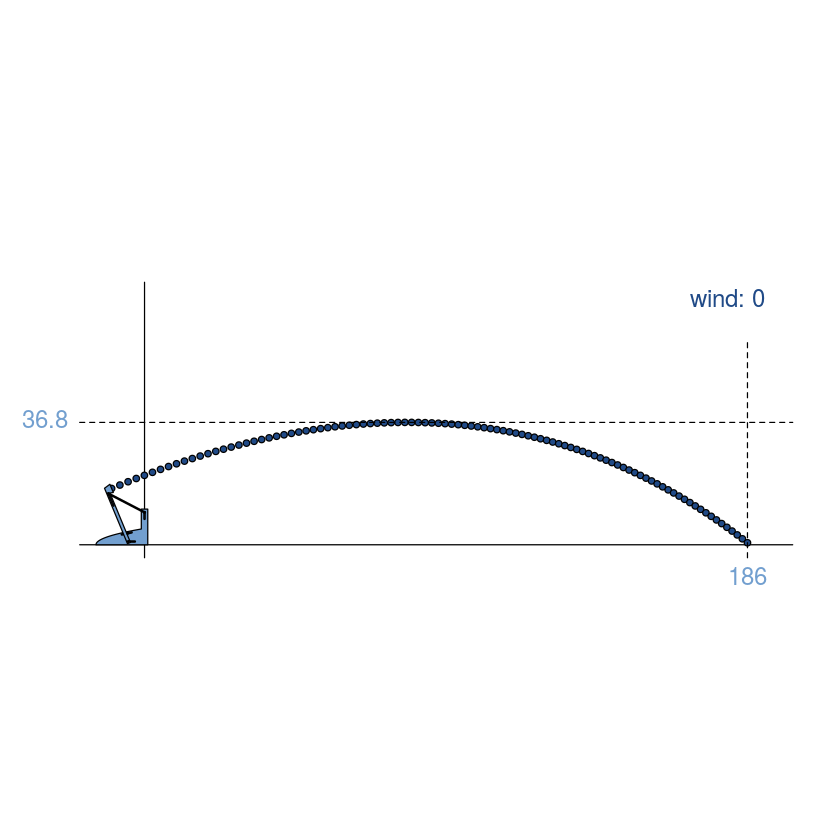


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -96.02841 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       96.028  |proj g|=       1.0155
At iterate     1  f =       95.676  |proj g|=       0.97155
At iterate     2  f =       94.755  |proj g|=       0.64771
At iterate     3  f =       94.461  |proj g|=         1.486
At iterate     4  f =       94.196  |proj g|=        1.4865
At iterate     5  f =       94.187  |proj g|=       0.48597
At iterate     6  f =       94.163  |proj g|=       0.33632
At iterate     7  f =       94.163  |proj g|=      0.021844
At iterate     8  f =       94.163  |proj g|=     

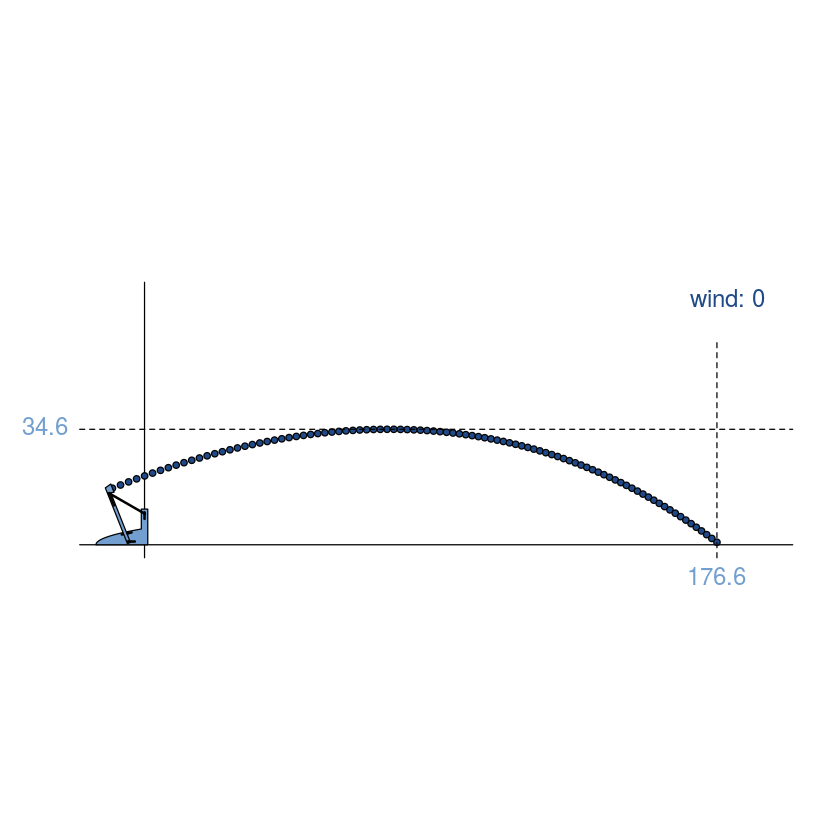


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -105.77 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       105.77  |proj g|=       1.7734
At iterate     1  f =       103.39  |proj g|=        1.5498
At iterate     2  f =       101.06  |proj g|=        1.3258
At iterate     3  f =       97.943  |proj g|=        1.0077
At iterate     4  f =       96.571  |proj g|=        1.4928
At iterate     5  f =       96.051  |proj g|=       0.69289
At iterate     6  f =       95.996  |proj g|=        1.4878
At iterate     7  f =       95.782  |proj g|=        1.4856
At iterate     8  f =       95.731  |proj g|=       

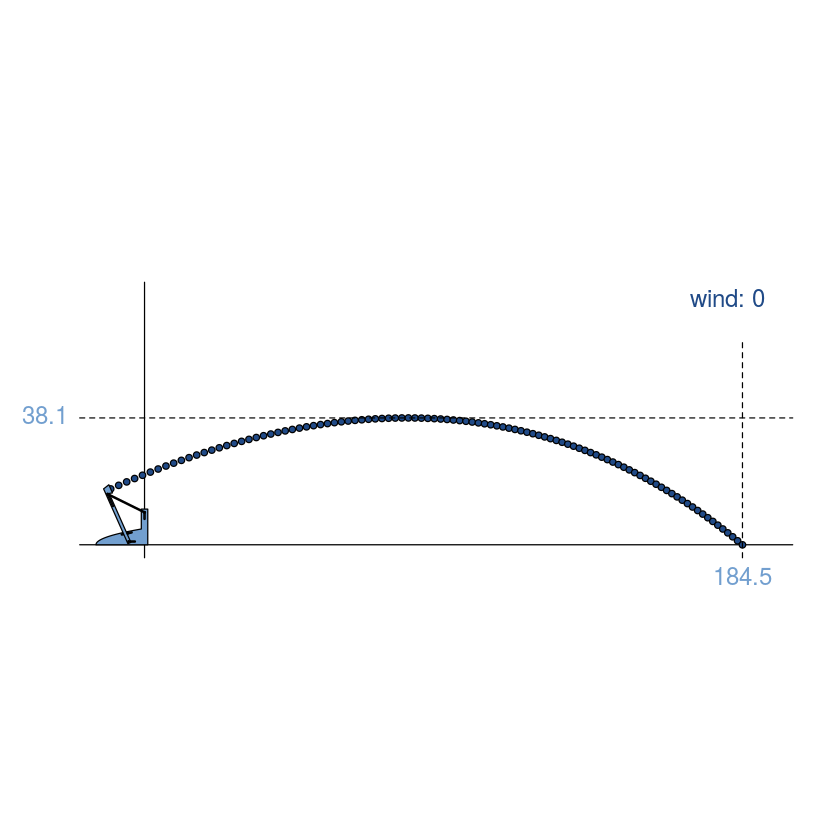


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -103.7896 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       103.79  |proj g|=       1.5439
At iterate     1  f =       103.31  |proj g|=        1.0305
At iterate     2  f =       102.86  |proj g|=        1.0199
At iterate     3  f =        102.1  |proj g|=        1.5191
At iterate     4  f =       101.75  |proj g|=        1.5011
At iterate     5  f =       101.53  |proj g|=       0.82467
At iterate     6  f =       101.33  |proj g|=        1.2302
At iterate     7  f =       101.26  |proj g|=       0.38037
At iterate     8  f =       101.23  |proj g|=     

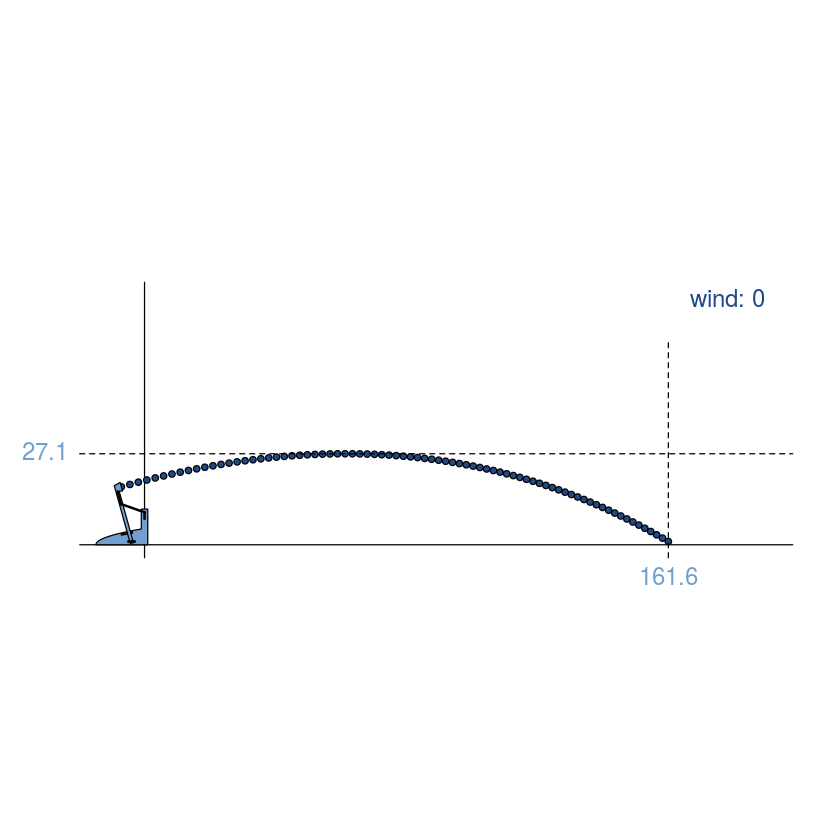


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -108.4576 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       108.46  |proj g|=      0.86801
At iterate     1  f =       107.46  |proj g|=       0.81094
At iterate     2  f =       105.65  |proj g|=        1.3134
At iterate     3  f =        105.1  |proj g|=         1.507
At iterate     4  f =       104.72  |proj g|=        1.0347
At iterate     5  f =        104.3  |proj g|=       0.38514
At iterate     6  f =       103.98  |proj g|=       0.65055
At iterate     7  f =       103.96  |proj g|=       0.38331
At iterate     8  f =       103.96  |proj g|=     

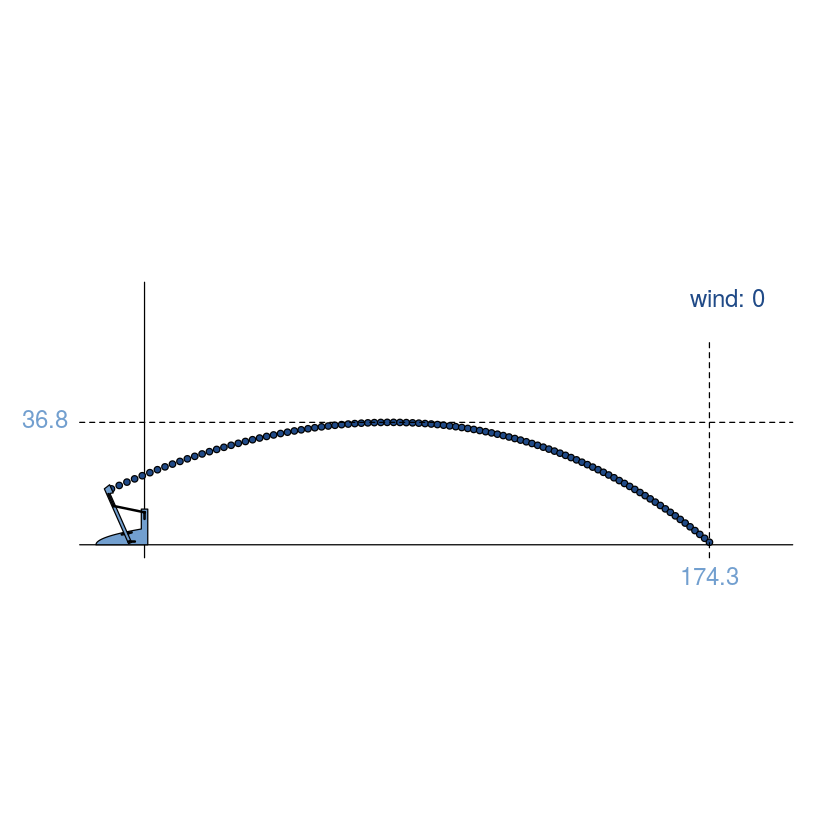


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -111.3357 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       111.34  |proj g|=       1.5929
At iterate     1  f =       109.12  |proj g|=        0.9069
At iterate     2  f =       108.36  |proj g|=       0.90389
At iterate     3  f =       107.38  |proj g|=        1.5145
At iterate     4  f =       106.77  |proj g|=        1.5017
At iterate     5  f =       106.47  |proj g|=       0.72389
At iterate     6  f =       106.41  |proj g|=       0.25089
At iterate     7  f =       106.39  |proj g|=       0.85675
At iterate     8  f =       106.29  |proj g|=     

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


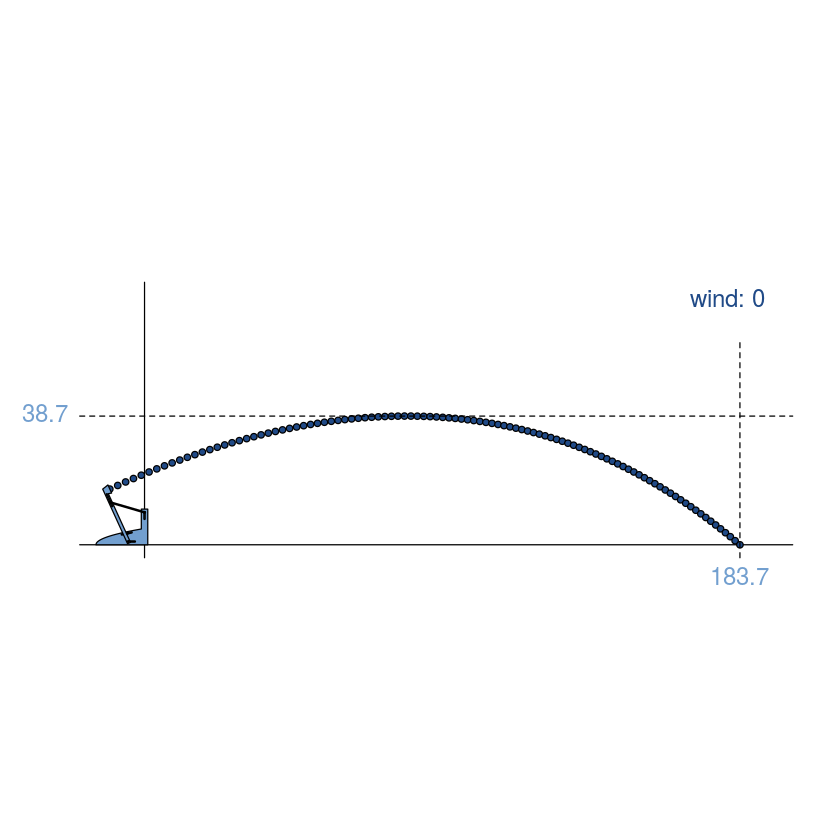


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 4.108602e-04

Parameters at the Solution (parameter, gradient):

 X[ 1] :	2.606037e-01	G[ 1] :	-4.271515e-08
 X[ 2] :	1.000000e+00	G[ 2] :	3.890538e-02
 X[ 3] :	5.807137e-01	G[ 3] :	4.692106e-08
 X[ 4] :	1.000000e+00	G[ 4] :	7.397143e-03

Solution Found Generation 12
Number of Generations Run 12

Tue Oct 27 13:53:20 2020
Total run time : 0 hours 0 minutes and 0 seconds


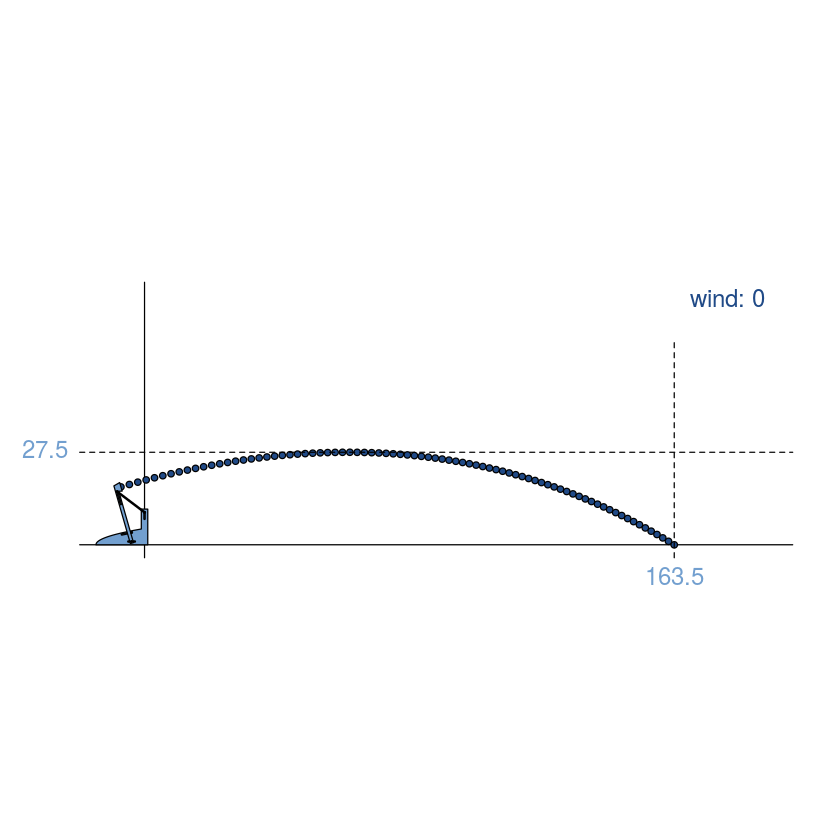


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -124.7319 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       124.73  |proj g|=       1.3614
At iterate     1  f =       123.84  |proj g|=        1.2597
At iterate     2  f =        119.9  |proj g|=       0.79446
At iterate     3  f =       118.88  |proj g|=       0.63449
At iterate     4  f =        116.5  |proj g|=        1.3933
At iterate     5  f =       115.27  |proj g|=        1.4965
At iterate     6  f =       115.02  |proj g|=        1.3497
At iterate     7  f =          115  |proj g|=       0.72617
At iterate     8  f =       114.97  |proj g|=     

Warning message in genoud(EI, nvars = d, max = TRUE, pop.size = control$pop.size, :
“Stopped because hard maximum generation limit was hit.”


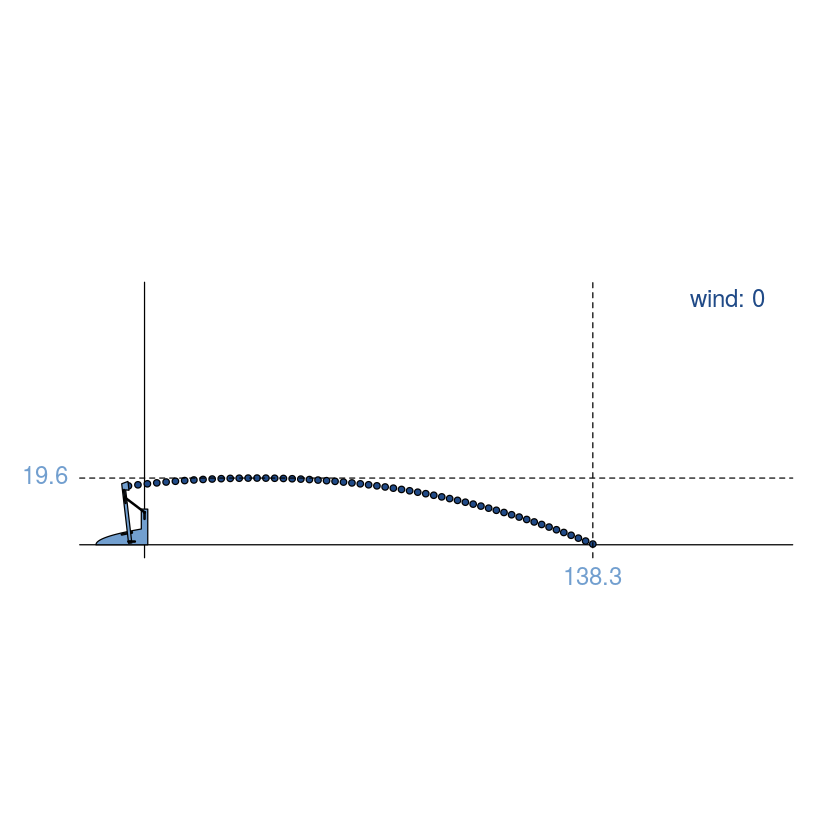


NOTE: HARD MAXIMUM GENERATION LIMIT HIT

Solution Fitness Value: 4.474491e-04

Parameters at the Solution (parameter, gradient):

 X[ 1] :	4.477375e-01	G[ 1] :	4.274461e-09
 X[ 2] :	8.557942e-01	G[ 2] :	2.530982e-09
 X[ 3] :	5.032965e-01	G[ 3] :	-4.838906e-09
 X[ 4] :	1.000000e+00	G[ 4] :	8.283061e-03

Solution Found Generation 12
Number of Generations Run 12

Tue Oct 27 13:53:21 2020
Total run time : 0 hours 0 minutes and 1 seconds


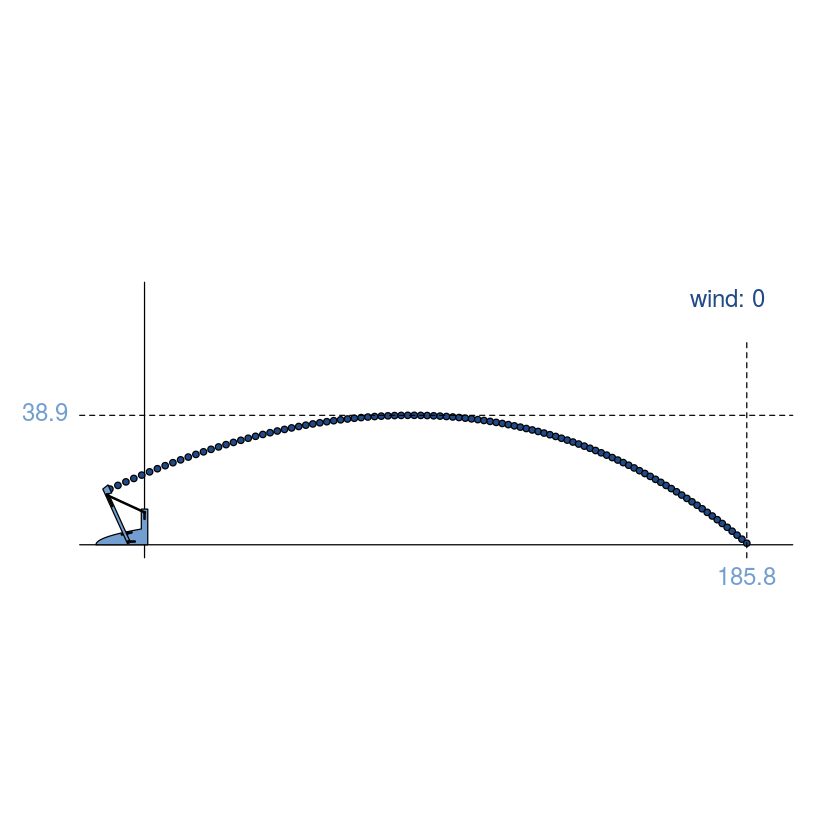


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -131.0749 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       131.07  |proj g|=       1.6212
At iterate     1  f =       125.76  |proj g|=       0.97817
At iterate     2  f =       123.59  |proj g|=       0.88482
At iterate     3  f =       121.67  |proj g|=        1.5234
At iterate     4  f =       120.66  |proj g|=        1.4687
At iterate     5  f =       120.46  |proj g|=        1.4653
At iterate     6  f =       119.68  |proj g|=       0.40038
At iterate     7  f =       119.66  |proj g|=       0.55616
At iterate     8  f =       119.61  |proj g|=     

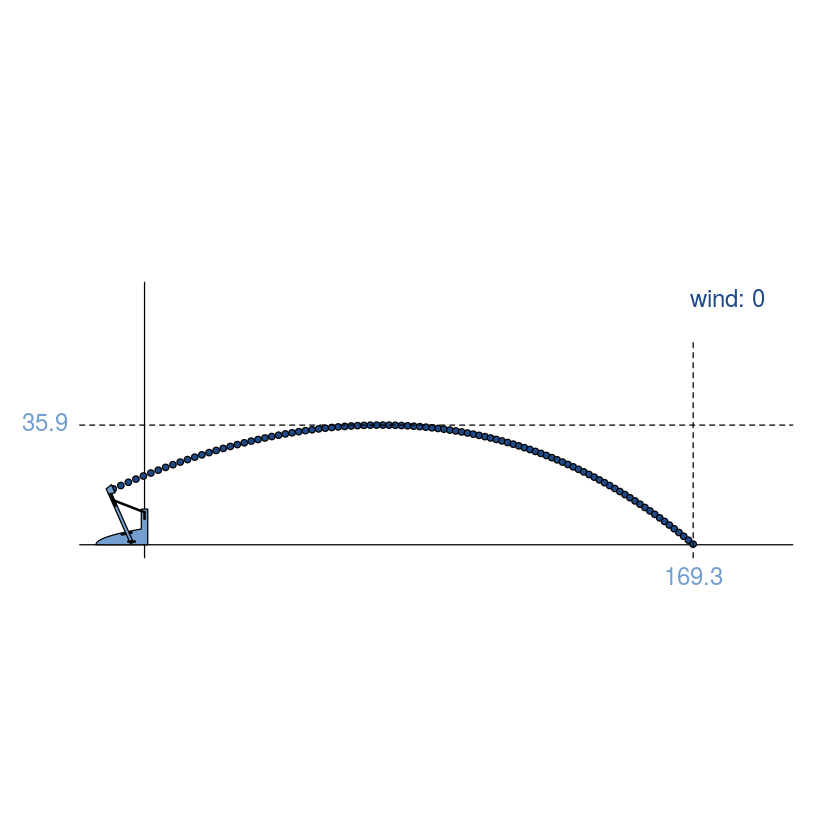


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -137.7874 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       137.79  |proj g|=       1.6389
At iterate     1  f =       137.67  |proj g|=        0.7616
At iterate     2  f =       130.37  |proj g|=       0.66298
At iterate     3  f =       128.55  |proj g|=        1.5598
At iterate     4  f =       125.36  |proj g|=        1.4839
At iterate     5  f =       124.09  |proj g|=        1.3867
At iterate     6  f =       124.04  |proj g|=       0.61871
At iterate     7  f =       124.01  |proj g|=       0.46132
At iterate     8  f =          124  |proj g|=     

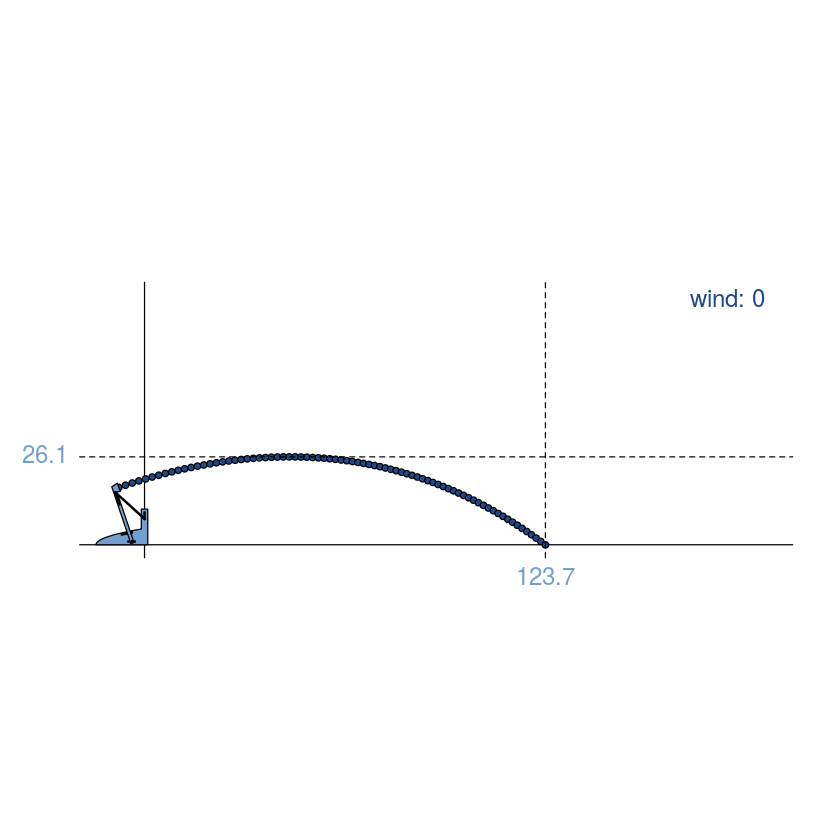


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -129.3957 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=        129.4  |proj g|=       1.5021
At iterate     1  f =       128.96  |proj g|=       0.63146
At iterate     2  f =        128.4  |proj g|=       0.59492
At iterate     3  f =        127.9  |proj g|=        1.3489
At iterate     4  f =       127.88  |proj g|=       0.59341
At iterate     5  f =       127.83  |proj g|=        0.5569
At iterate     6  f =       127.78  |proj g|=       0.56817
At iterate     7  f =       127.71  |proj g|=       0.57674
At iterate     8  f =       127.69  |proj g|=     

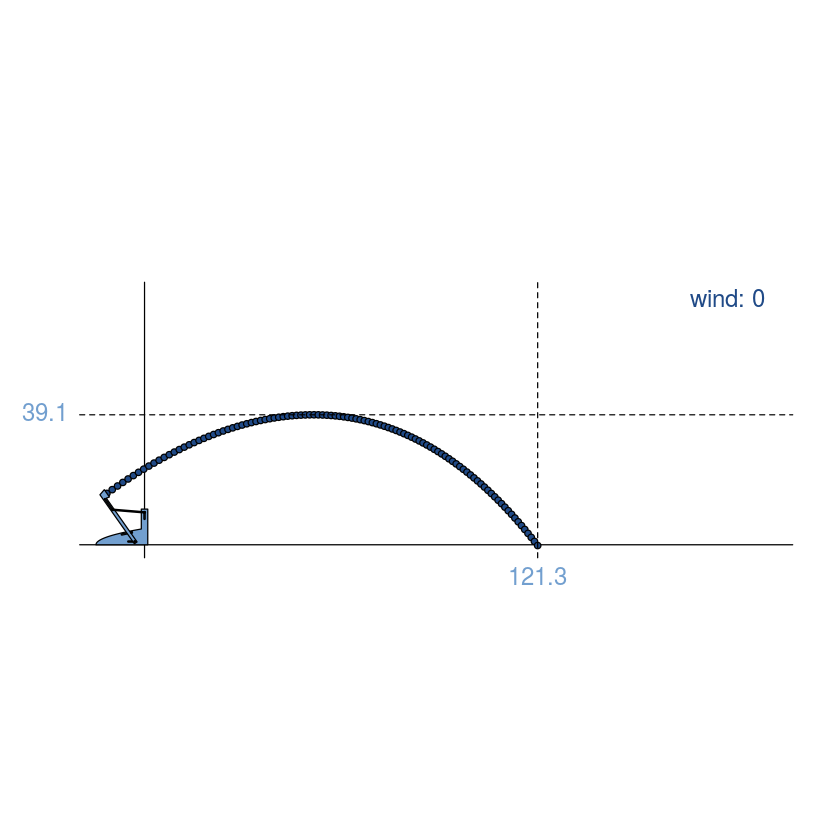


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -133.6806 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       133.68  |proj g|=        1.507
At iterate     1  f =       132.52  |proj g|=        1.4849
At iterate     2  f =        132.1  |proj g|=       0.54241
At iterate     3  f =       131.72  |proj g|=       0.71882
At iterate     4  f =       131.55  |proj g|=       0.55237
At iterate     5  f =       131.24  |proj g|=       0.41629
At iterate     6  f =        131.2  |proj g|=       0.17387
At iterate     7  f =        131.2  |proj g|=      0.028598
At iterate     8  f =        131.2  |proj g|=     

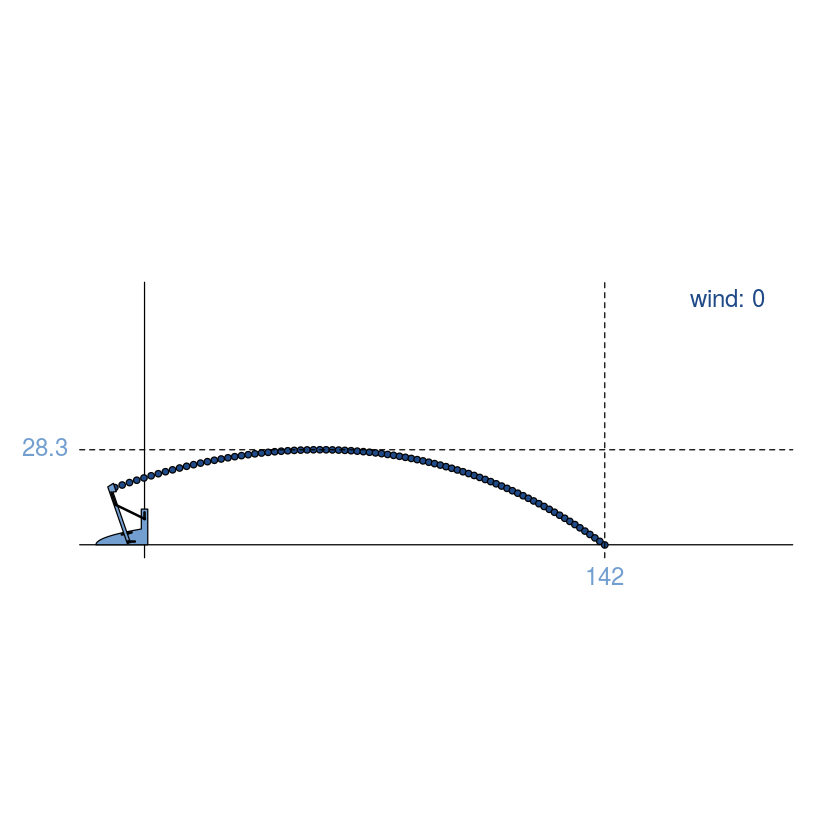


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -144.4474 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       144.45  |proj g|=      0.99794
At iterate     1  f =       141.21  |proj g|=       0.90128
At iterate     2  f =       137.35  |proj g|=        1.4993
At iterate     3  f =       136.23  |proj g|=        1.4879
At iterate     4  f =       135.14  |proj g|=        1.4017
At iterate     5  f =       134.83  |proj g|=        1.3686
At iterate     6  f =       134.38  |proj g|=       0.57897
At iterate     7  f =        134.2  |proj g|=       0.75496
At iterate     8  f =       134.17  |proj g|=     

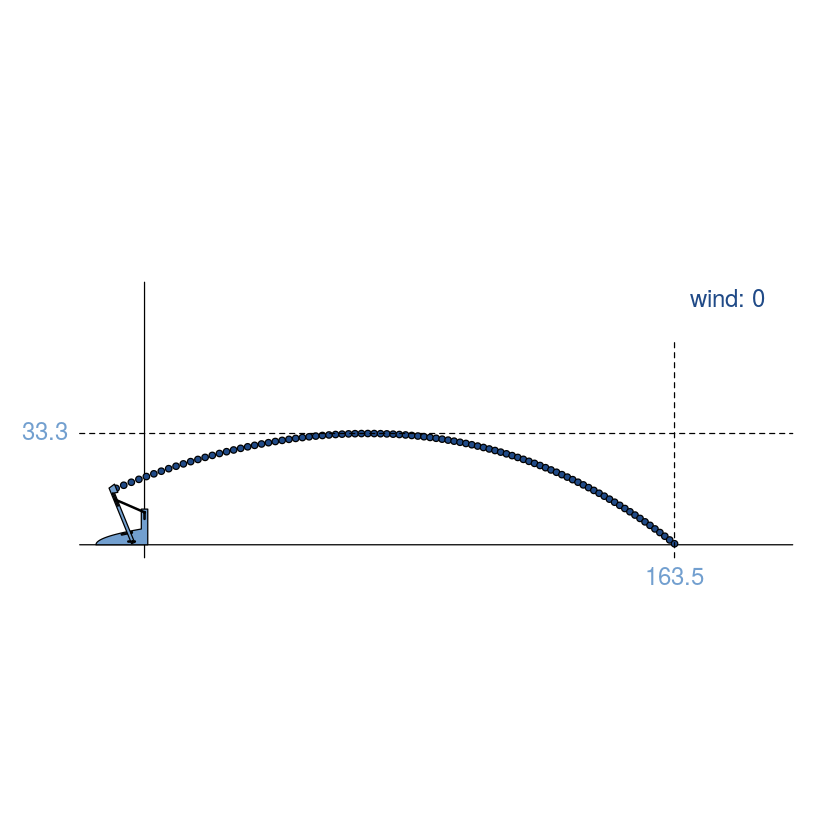


optimisation start
------------------
* estimation method   : MLE 
* optimisation method : BFGS 
* analytical gradient : used
* trend model : ~1
* covariance model : 
  - type :  matern5_2 
  - nugget : NO
  - parameters lower bounds :  1e-10 1e-10 1e-10 1e-10 
  - parameters upper bounds :  1.904242 1.858506 1.786693 1.846968 
  - best initial criterion value(s) :  -150.3082 

N = 4, M = 5 machine precision = 2.22045e-16
At X0, 0 variables are exactly at the bounds
At iterate     0  f=       150.31  |proj g|=       1.1715
At iterate     1  f =       146.62  |proj g|=        1.0484
At iterate     2  f =       142.17  |proj g|=        1.5258
At iterate     3  f =       140.37  |proj g|=        1.5135
At iterate     4  f =       138.39  |proj g|=        1.3707
At iterate     5  f =       138.22  |proj g|=        1.2345
At iterate     6  f =       138.05  |proj g|=        1.4835
At iterate     7  f =       137.89  |proj g|=         1.484
At iterate     8  f =       137.71  |proj g|=     

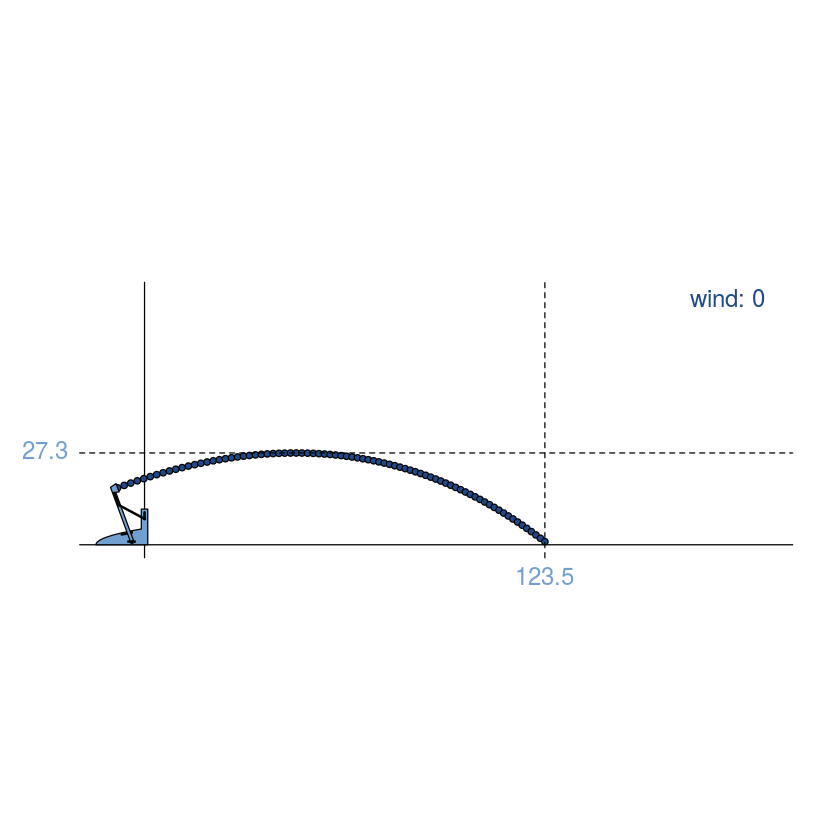

In [9]:
# Do a loop to automatize the process (for noise-free observations, you can also use EGO.nsteps)
nsteps <- 20
mGP <- mGP0
EGOpar <- matrix(NA, nrow = nsteps, ncol = d)
EGOvalue <- rep(NA, nsteps)
for (i in 1:nsteps){
    oEGO <- max_EI(model = mGP, lower = rep(0, d), upper = rep(1, d))
    newX <- EGOpar[i, ] <- oEGO$par
    newy <- EGOvalue[i] <- runExperimentFun(newX)
    mGP <- update(mGP, newX, newy)
}

bestIndex <- which.min(EGOvalue)
cat("longest shot observed:", - round(EGOvalue[bestIndex], 2),
    "\ncorresponding input values:", round(EGOpar[bestIndex, ], 2))


Global minimum found by EGO:

[1] 0.0000000 0.6018946 0.0000000 1.0000000

[1] -186.0471

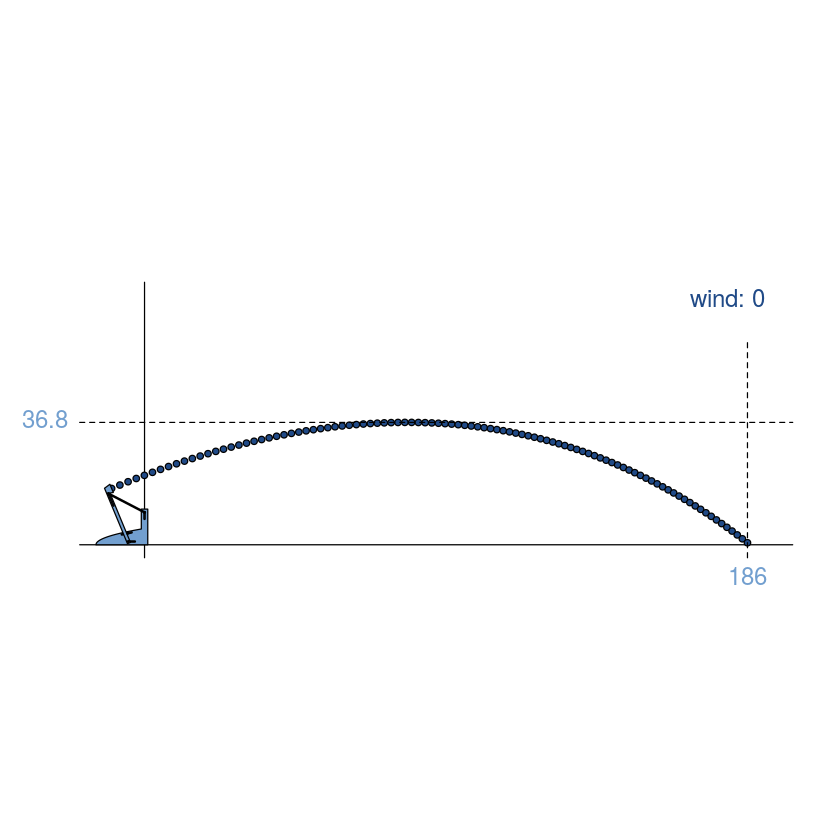

In [10]:
EGOpar[bestIndex, ]
runExperimentFun(EGOpar[bestIndex, ])

Let us visualize the 20 points computed with EGO in the X-Y space, and in time order.

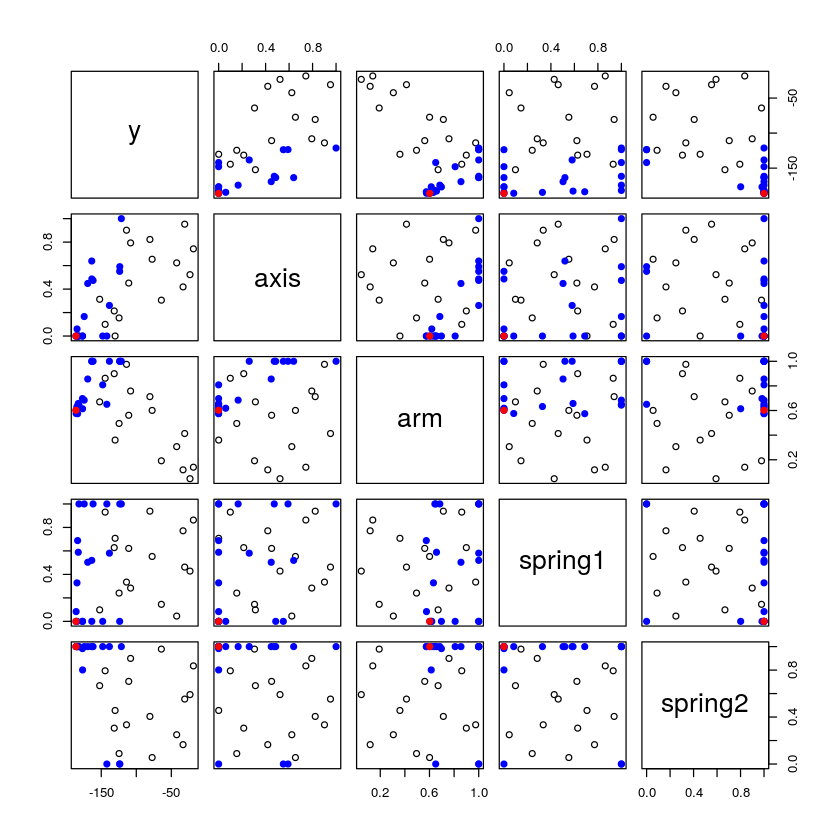

In [11]:
visualizeEGO <- function(initDesign, initValues, EGOpoints, EGOvalues){
  bestIndex <- which.min(EGOvalues)
  y <- c(initValues, EGOvalues, EGOvalues[bestIndex])
  X <- rbind(initDesign, EGOpoints, EGOpoints[bestIndex, ])
  nsteps <- nrow(EGOpoints)
  pairs(cbind(y, X), 
        col = c(rep("black", ninit), rep("blue", nsteps), "red"),
        pch = c(rep(1, ninit), rep(19, nsteps + 1)))
}

visualizeEGO(initDesign = X, initValues = Y,
             EGOpoints = EGOpar, EGOvalues = EGOvalue)

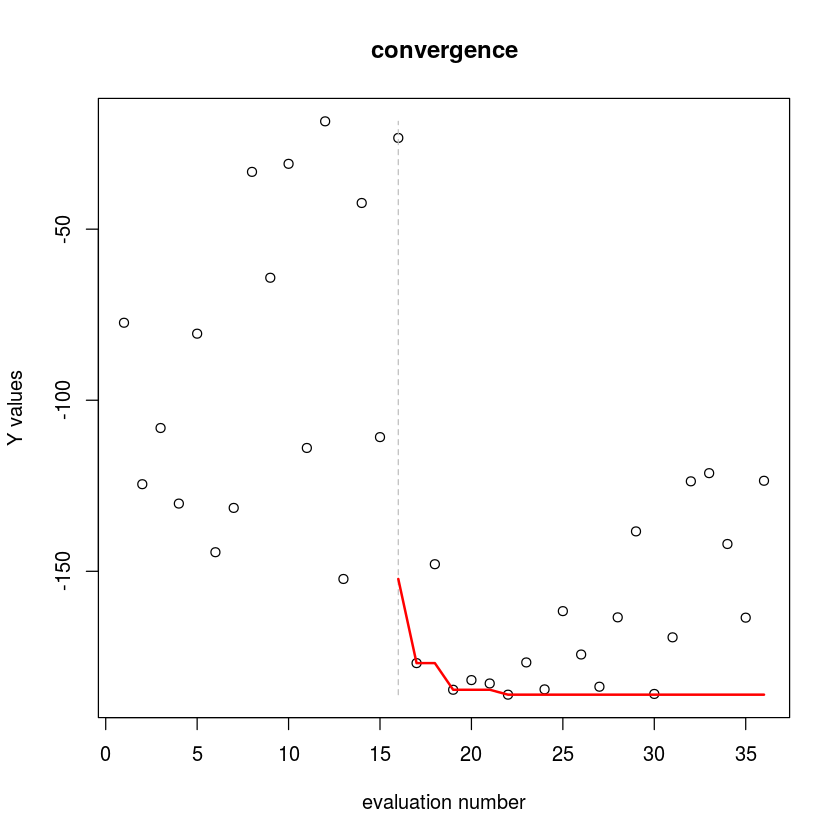

In [12]:
plot(c(Y, EGOvalue), main = "convergence", xlab = "evaluation number", ylab = "Y values")
lines(rep(ninit, 2), range(Y, EGOvalue), lty = 2, col = "gray")
lines(ninit + 0:nsteps, cummin(c(min(Y), EGOvalue)), col = "red", lwd = 2)

 Questions : 
 * *Why the EGO method would be much less efficient by using a linear model instead of a GP model?*
 * *Modify the code in order to deal with noisy observations, with the EQI criterion (mind using the argument 'noise.var' in 'km').*
 * *Investigate the influence: [a] of a trend in the model (change 'formula' in 'km'); [b] of a kernel; [c] of the initial sample size.*
 * *Adapt the EGO method in order to provide a batch of 2 points at one (function qEGO.nsteps), which is useful in practice, as the 2 runs of the time-consuming simulator can be done in parallel.*